In [1]:
# Import libraries and read in the csv that was created with the notebook "preprocessing_data.ipynb".
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.pyplot import figure

df = pd.read_csv('../data/preprocessed/preprocessed_data.csv')

/Users/theres/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
df

Crime ID       Month                  Reported by  \
0            NaN  2021-09-01  Metropolitan Police Service   
1            NaN  2021-09-01  Metropolitan Police Service   
2            NaN  2021-09-01  Metropolitan Police Service   
3            NaN  2021-09-01  Metropolitan Police Service   
4            NaN  2021-09-01  Metropolitan Police Service   
...          ...         ...                          ...   
1183956      NaN  2020-11-01     British Transport Police   
1183957      NaN  2020-11-01     British Transport Police   
1183958      NaN  2020-11-01     British Transport Police   
1183959      NaN  2020-11-01     British Transport Police   
1183960      NaN  2020-11-01     British Transport Police   

                        Falls within  Longitude   Latitude  \
0        Metropolitan Police Service   0.135866  51.587336   
1        Metropolitan Police Service   0.140035  51.589112   
2        Metropolitan Police Service   0.140192  51.582311   
3        Metropolitan Police Service   0.134947  51.588063   
4        Metropolitan Police Service   0.140192  51.582311   
...                              ...        ...        ...   
1183956     British Transport Police  -0.133463  51.489300   
1183957     British Transport Police  -0.505346  51.339500   
1183958     British Transport Police  -0.505346  51.339500   
1183959     British Transport Police  -0.505346  51.339500   
1183960     British Transport Police  -0.505346  51.339500   

                                  Location  LSOA code  \
0               On or near Gibbfield Close  E01000027   
1               On or near Beansland Grove  E01000027   
2                   On or near Hatch Grove  E01000027   
3                    On or near Mead Grove  E01000027   
4                   On or near Hatch Grove  E01000027   
...                                    ...        ...   
1183956    On or near Pimlico (Lu Station)  E01004741   
1183957  On or near West Byfleet (Station)  E01031004   
1183958  On or near West Byfleet (Station)  E01031004   
1183959  On or near West Byfleet (Station)  E01031004   
1183960  On or near West Byfleet (Station)  E01031004   

                         LSOA name                    Crime type  \
0        Barking and Dagenham 001A         Anti-social behaviour   
1        Barking and Dagenham 001A         Anti-social behaviour   
2        Barking and Dagenham 001A         Anti-social behaviour   
3        Barking and Dagenham 001A         Anti-social behaviour   
4        Barking and Dagenham 001A         Anti-social behaviour   
...                            ...                           ...   
1183956           Westminster 024F  Violence and sexual offences   
1183957                Woking 002E                 Bicycle theft   
1183958                Woking 002E                 Bicycle theft   
1183959                Woking 002E                  Public order   
1183960                Woking 002E                 Vehicle crime   

        Last outcome category  Context                          Location type  \
0                         NaN      NaN                              On Street   
1                         NaN      NaN                              On Street   
2                         NaN      NaN                              On Street   
3                         NaN      NaN                              On Street   
4                         NaN      NaN                              On Street   
...                       ...      ...                                    ...   
1183956                   NaN      NaN  On or near London Underground Station   
1183957                   NaN      NaN     On or near Train Station/Tram Stop   
1183958                   NaN      NaN     On or near Train Station/Tram Stop   
1183959                   NaN      NaN     On or near Train Station/Tram Stop   
1183960                   NaN      NaN     On or near Train Station/Tram Stop   

        Season  
0         Fall  
1         Fall  
2   

In [3]:
# Analysis on crime types

In [4]:
# Create a pivot table showing the total number of crimes by month 
df_pivot_month = pd.pivot_table(df, values='Reported by' , index='Month', aggfunc='count')
df_pivot_month

Reported by
Month                  
2020-11-01        98176
2020-12-01        89064
2021-01-01        85566
2021-02-01        80650
2021-03-01        92350
2021-04-01        87758
2021-05-01        92831
2021-06-01        96351
2021-07-01        95744
2021-08-01        89509
2021-09-01        91171
2021-10-01        94263
2021-11-01        90528

In [5]:
# Calculate the average crime counts per month
df_pivot_month.mean()

Reported by    91073.923077
dtype: float64

In [6]:
df_pivot_month.median()

Reported by    91171.0
dtype: float64

In [8]:
df_pivot_month = df_pivot_month.reset_index()

In [25]:
# Import Matplot library to display plots.
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,15)

<ipython-input-12-903a655b99d9>:3: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.bar(df_pivot_month['Month'], df_pivot_month['Reported by'], Width =0.8)


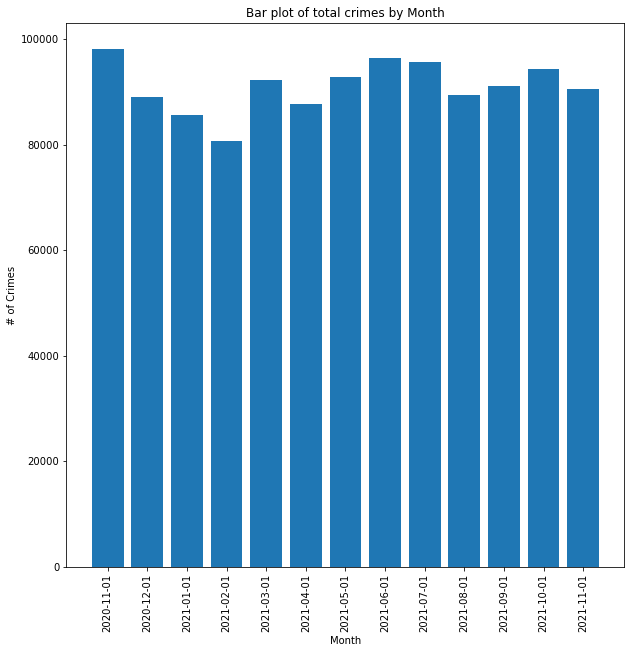

In [12]:
# Create a bar chart of the numbers of crimes per month
plt.figure(figsize=(10,10))
plt.bar(df_pivot_month['Month'], df_pivot_month['Reported by'], Width =0.8)
plt.ylabel("# of Crimes")
plt.xlabel("Month")
plt.xticks(rotation=90)
plt.title("Bar plot of total crimes by Month")

plt.show()

In [13]:
# Create a pivot table showing the total number of crimes by crime type and month 
df_pivot_ct_month = pd.pivot_table(df, values='Reported by', index='Month', columns='Crime type',
                          aggfunc='count')
df_pivot_ct_month

Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
Month                                                        
2020-11-01                  33930           2079      5200   
2020-12-01                  29438           1352      4761   
2021-01-01                  33691           1076      4274   
2021-02-01                  29210           1127      4048   
2021-03-01                  30663           1677      4631   
2021-04-01                  27186           1891      4141   
2021-05-01                  26203           2124      4166   
2021-06-01                  27708           2198      4234   
2021-07-01                  26313           2306      4226   
2021-08-01                  23406           2121      4316   
2021-09-01                  21987           2321      4312   
2021-10-01                  21087           2088      4684   
2021-11-01                  18061           1791      4822   

Crime type  Criminal damage and arson  Drugs  Other crime  Other theft  \
Month                                                                    
2020-11-01                       4336   4562          985         5828   
2020-12-01                       4216   3783          782         6435   
2021-01-01                       3738   3827          744         4889   
2021-02-01                       3675   4184          756         4662   
2021-03-01                       4334   4371          916         5335   
2021-04-01                       4422   3878          884         6178   
2021-05-01                       4804   3530          952         6877   
2021-06-01                       4994   3288          814         8259   
2021-07-01                       4776   3330          900         8412   
2021-08-01                       4632   3231          779         8255   
2021-09-01                       4560   3010          866         9047   
2021-10-01                       4664   3683          952         9483   
2021-11-01                       4577   3675          865         9817   

Crime type  Possession of weapons  Public order  Robbery  Shoplifting  \
Month                                                                   
2020-11-01                    548          4489     2356         2863   
2020-12-01                    415          4117     2060         2764   
2021-01-01                    373          3622     1498         2140   
2021-02-01                    405          3525     1362         2282   
2021-03-01                    429          5148     1667         2521   
2021-04-01                    361          5189     1747         2729   
2021-05-01                    394          5736     1780         3057   
2021-06-01                    416          6054     1910         3030   
2021-07-01                    445          6324     1894         3062   
2021-08-01                    408          5134     1927         3253   
2021-09-01                    408          5424     2228         2790   
2021-10-01                    448          5584     2256         3107   
2021-11-01                    475          5215     2306         2996   

Crime type  Theft from the person  Vehicle crime  Violence and sexual offences  
Month                                                                           
2020-11-01                   2786           9134                         19080  
2020-12-01                   3293           7717                         17931  
2021-01-01                   1733           7647                         16314  
2021-02-01                   1651           7600                         16163  
2021-03-01                   2277           8271                         20110  
2021-04-01                   2673           7065                         19414  
2021-05-01                   3366           7746                         22096  
2021-06-01                   3102           8009                         22335  
2021-07-01                   3411           7640    

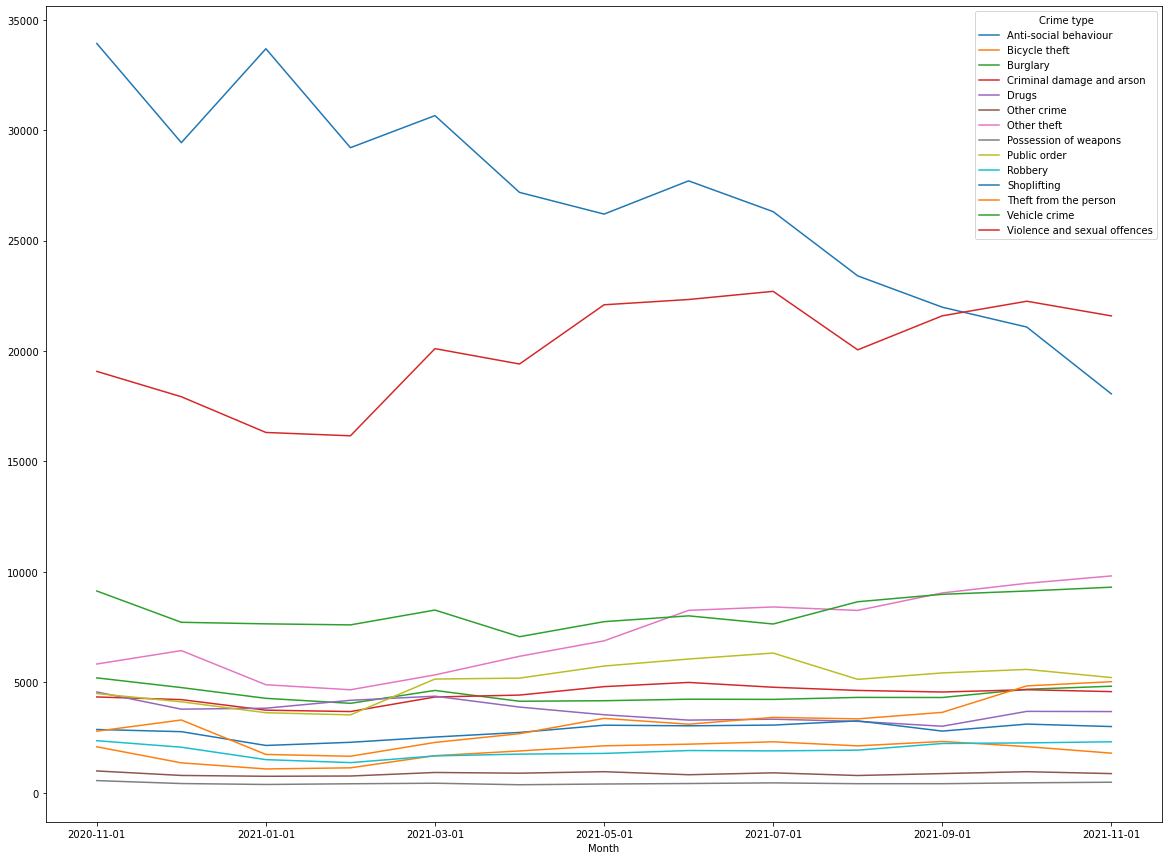

In [14]:
# Create a line chart showing the total number of crimes for each crime type by month

df_pivot_ct_month.plot()

plt.show()

In [15]:
df['Crime type'].value_counts()

Anti-social behaviour           348883
Violence and sexual offences    261649
Vehicle crime                   106901
Other theft                      93477
Public order                     65561
Burglary                         57815
Criminal damage and arson        57728
Drugs                            48352
Theft from the person            41139
Shoplifting                      36594
Robbery                          24991
Bicycle theft                    24151
Other crime                      11195
Possession of weapons             5525
Name: Crime type, dtype: int64

In [16]:
df['Crime type'].value_counts(normalize = True)

Anti-social behaviour           0.294674
Violence and sexual offences    0.220995
Vehicle crime                   0.090291
Other theft                     0.078953
Public order                    0.055374
Burglary                        0.048832
Criminal damage and arson       0.048758
Drugs                           0.040839
Theft from the person           0.034747
Shoplifting                     0.030908
Robbery                         0.021108
Bicycle theft                   0.020398
Other crime                     0.009456
Possession of weapons           0.004667
Name: Crime type, dtype: float64

In [17]:
# Create labels for pie chart on crime types
crime = ['Anti-social behaviour (29.5%)','Violence and sexual offences (22.1%)','Vehicle crime (9.0%)','Other theft (7.9%)','Public order (5.5%)','Burglary (4.9%)','Criminal damage and arson (4.9%)','Drugs (4.1%)','Theft from the person (3.5%)','Shoplifting (3.1%)','Robbery(2.1%)','Bicycle theft (2.0%)','Other crime (0.9%)','Possession of weapons (0.5%)']

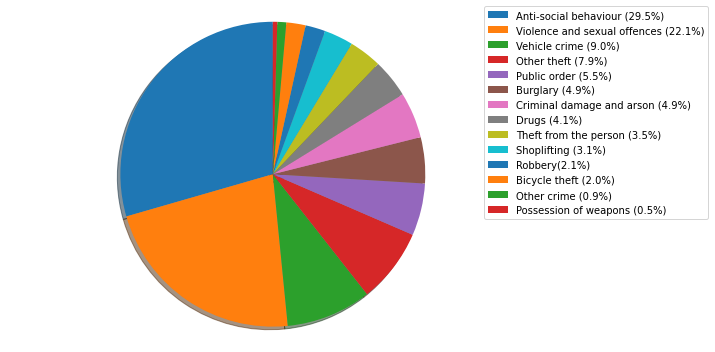

In [18]:
# Plot a pie chart on crime types
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

labels = crime
sizes =  df['Crime type'].value_counts()

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches,labels,bbox_to_anchor=(0.9, 1), loc=2, borderaxespad=0.)
plt.axis('equal')

plt.show()

In [19]:
# Create a table of crime counts by season
season_pivot = pd.pivot_table(df, values='Reported by', index='Season', aggfunc='count')
season_pivot

Reported by
Season             
Fall         283610
Spring       272939
Summer       281604
Winter       255280

In [20]:
# Order the seasons correctly from Spring to Winter
season_pivot = season_pivot.reindex(index=['Spring','Summer','Fall','Winter'])
season_pivot

Reported by
Season             
Spring       272939
Summer       281604
Fall         283610
Winter       255280

<ipython-input-22-36451f0064cd>:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.bar(season_pivot['Season'], season_pivot['Reported by'], Width =0.8)


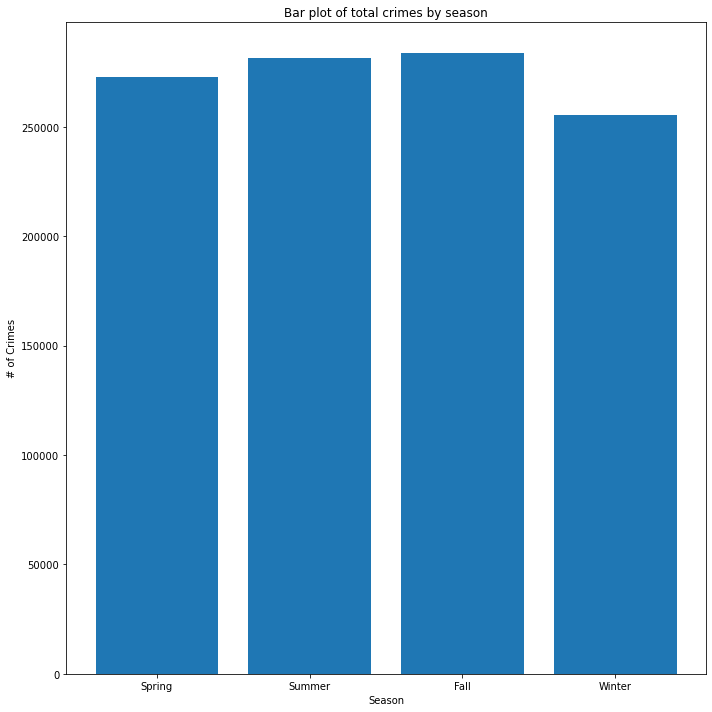

In [22]:
# Create a bar plot of crime counts by season
season_pivot = season_pivot.reset_index()
plt.figure(figsize=(10,10))
plt.bar(season_pivot['Season'], season_pivot['Reported by'], Width =0.8)
plt.ylabel("# of Crimes")
plt.xlabel("Season")
plt.title("Bar plot of total crimes by season")

plt.show()

In [23]:
# Create a pivot table of crime types aggregated by season and directly order the seasons correctly.
df_pivot_crime = pd.pivot_table(df, values='Reported by', index='Season', columns='Crime type', aggfunc='count')
df_pivot_crime = df_pivot_crime.reindex(index=['Spring','Summer','Fall','Winter'])
df_pivot_crime

Crime type  Anti-social behaviour  Bicycle theft  Burglary  \
Season                                                       
Spring                      84052           5692     12938   
Summer                      77427           6625     12776   
Fall                        77004           6488     14196   
Winter                      92339           3555     13083   

Crime type  Criminal damage and arson  Drugs  Other crime  Other theft  \
Season                                                                   
Spring                          13560  11779         2752        18390   
Summer                          14402   9849         2493        24926   
Fall                            13560  11255         2803        24358   
Winter                          11629  11794         2282        15986   

Crime type  Possession of weapons  Public order  Robbery  Shoplifting  \
Season                                                                  
Spring                       1184         16073     5194         8307   
Summer                       1269         17512     5731         9345   
Fall                         1404         15497     6840         8760   
Winter                       1193         11264     4920         7186   

Crime type  Theft from the person  Vehicle crime  Violence and sexual offences  
Season                                                                          
Spring                       8316          23082                         61620  
Summer                       9857          24297                         65095  
Fall                        11261          27251                         62933  
Winter                       6677          22964                         50408

In [ ]:
# Import Matplot library to display plots.
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,15)

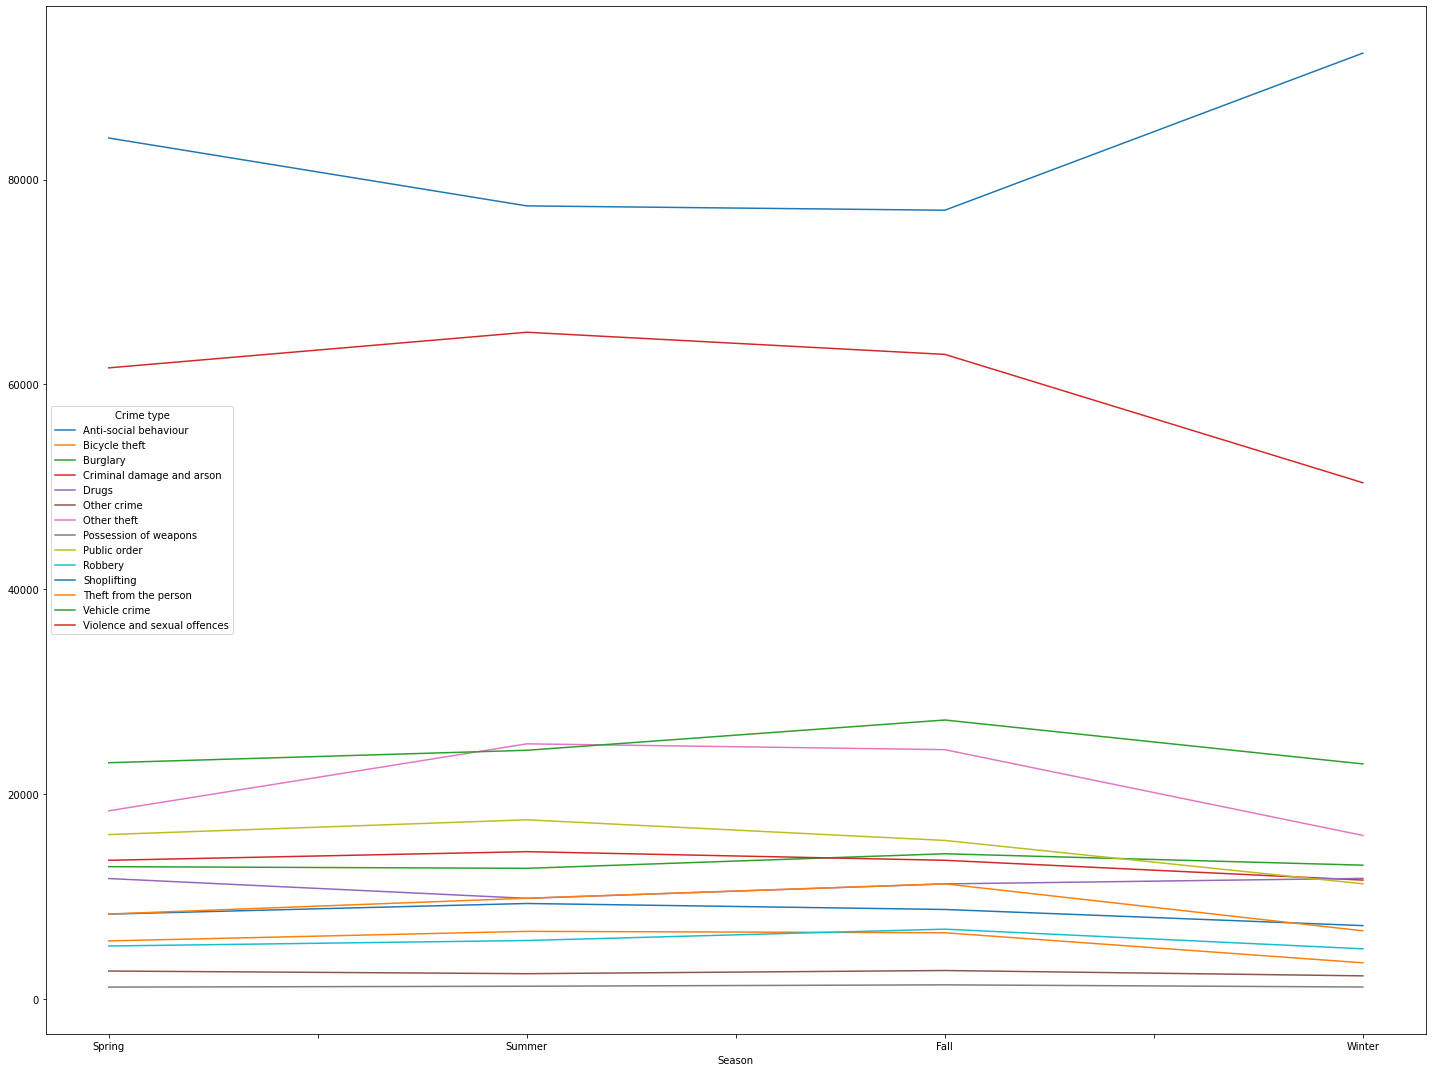

In [26]:
# Create a line plot of crime types aggregated by season
df_pivot_crime.plot()

plt.show()

In [27]:
# Create a new table grouped by season and crime types
table_crime = df.groupby(by=['Season','Crime type']).count()
table_crime

Crime ID  Month  Reported by  \
Season Crime type                                                   
Fall   Anti-social behaviour                0  77004        77004   
       Bicycle theft                     6147   6488         6488   
       Burglary                         14180  14196        14196   
       Criminal damage and arson        13220  13560        13560   
       Drugs                            10980  11255        11255   
       Other crime                       2763   2803         2803   
       Other theft                      23715  24358        24358   
       Possession of weapons             1334   1404         1404   
       Public order                     14551  15497        15497   
       Robbery                           6671   6840         6840   
       Shoplifting                       8632   8760         8760   
       Theft from the person            10425  11261        11261   
       Vehicle crime                    27156  27251        27251   
       Violence and sexual offences     61757  62933        62933   
Spring Anti-social behaviour                0  84052        84052   
       Bicycle theft                     5480   5692         5692   
       Burglary                         12929  12938        12938   
       Criminal damage and arson        13124  13560        13560   
       Drugs                            11376  11779        11779   
       Other crime                       2714   2752         2752   
       Other theft                      17993  18390        18390   
       Possession of weapons             1124   1184         1184   
       Public order                     15239  16073        16073   
       Robbery                           5057   5194         5194   
       Shoplifting                       8217   8307         8307   
       Theft from the person             7810   8316         8316   
       Vehicle crime                    23028  23082        23082   
       Violence and sexual offences     60651  61620        61620   
Summer Anti-social behaviour                0  77427        77427   
       Bicycle theft                     6279   6625         6625   
       Burglary                         12760  12776        12776   
       Criminal damage and arson        14047  14402        14402   
       Drugs                             9634   9849         9849   
       Other crime                       2444   2493         2493   
       Other theft                      24304  24926        24926   
       Possession of weapons             1226   1269         1269   
       Public order                     16439  17512        17512   
       Robbery                           5621   5731         5731   
       Shoplifting                       9236   9345         9345   
       Theft from the person             9190   9857         9857   
       Vehicle crime                    24211  24297        24297   
       Violence and sexual offences     63852  65095        65095   
Winter Anti-social behaviour                0  92339        92339   
       Bicycle theft                     3479   3555         3555   
       Burglary                         13069  13083        13083   
       Criminal damage and arson        11256  11629        11629   
       Drugs                            11351  11794        11794   
       Other crime                       2251   2282         2282   
       Other theft                      15678  15986        15986   
       Possession of weapons             1116   1193         1193   
       Public order                     10657  11264        11264   
       Robbery                           4773   4920         4920   
       Shoplifting                       7111   7186         7186   
       Theft from the person             6191   6677         6677   
       Vehicle crime                    22929  22964        22964   
       Violence and sexual offences     49759  50408        50408   

                                  

In [28]:
# Group dataframe by crime type
crime_grp = df.groupby(['Crime type'])

In [29]:
# Show percantage of locations grouped by crime types
crime_grp['Location type'].value_counts(normalize=True).head(60)

Crime type                 Location type                                 
Anti-social behaviour      On Street                                         0.888848
                           On or near Parking Area                           0.020680
                           On or near Supermarket                            0.020250
                           On or near Sports/Recreation Area                 0.014423
                           On or near Petrol Station                         0.010218
                           On or near Shopping Area                          0.009608
                           On or near Underpass                              0.007676
                           On or near Further/Higher Educational Building    0.004919
                           On or near Theatre/Concert Hall                   0.004663
                           On or near Nightclub                              0.004563
                           On or near Police Station              

In [30]:
# Analysing crime type violence and sexual offences
crime_grp['Location type'].value_counts(normalize=True).loc['Violence and sexual offences']

Location type
On Street                                         0.851824
On or near Supermarket                            0.025668
On or near Parking Area                           0.020543
On or near Sports/Recreation Area                 0.014172
On or near Petrol Station                         0.012066
On or near Shopping Area                          0.011974
On or near Hospital                               0.010040
On or near Train Station/Tram Stop                0.010036
On or near Nightclub                              0.007911
On or near Underpass                              0.007415
On or near London Underground Station             0.007380
On or near Police Station                         0.005599
On or near Further/Higher Educational Building    0.005404
On or near Theatre/Concert Hall                   0.003745
On or near Conference/Exhibition Centre           0.001892
On or near Park/Open Space                        0.001743
On or near Bus/Coach Station              

In [31]:
# Analysis on location types 

In [32]:
# Create a new table with locations and their total counts
location_type_counts = df['Location type'].value_counts().rename_axis('location').reset_index(name='counts')

In [33]:
location_type_counts.iloc[0:7]

location  counts
0                           On Street  977360
1              On or near Supermarket   40298
2             On or near Parking Area   29104
3            On or near Shopping Area   25116
4           On or near Petrol Station   18966
5   On or near Sports/Recreation Area   15864
6  On or near Train Station/Tram Stop   11754

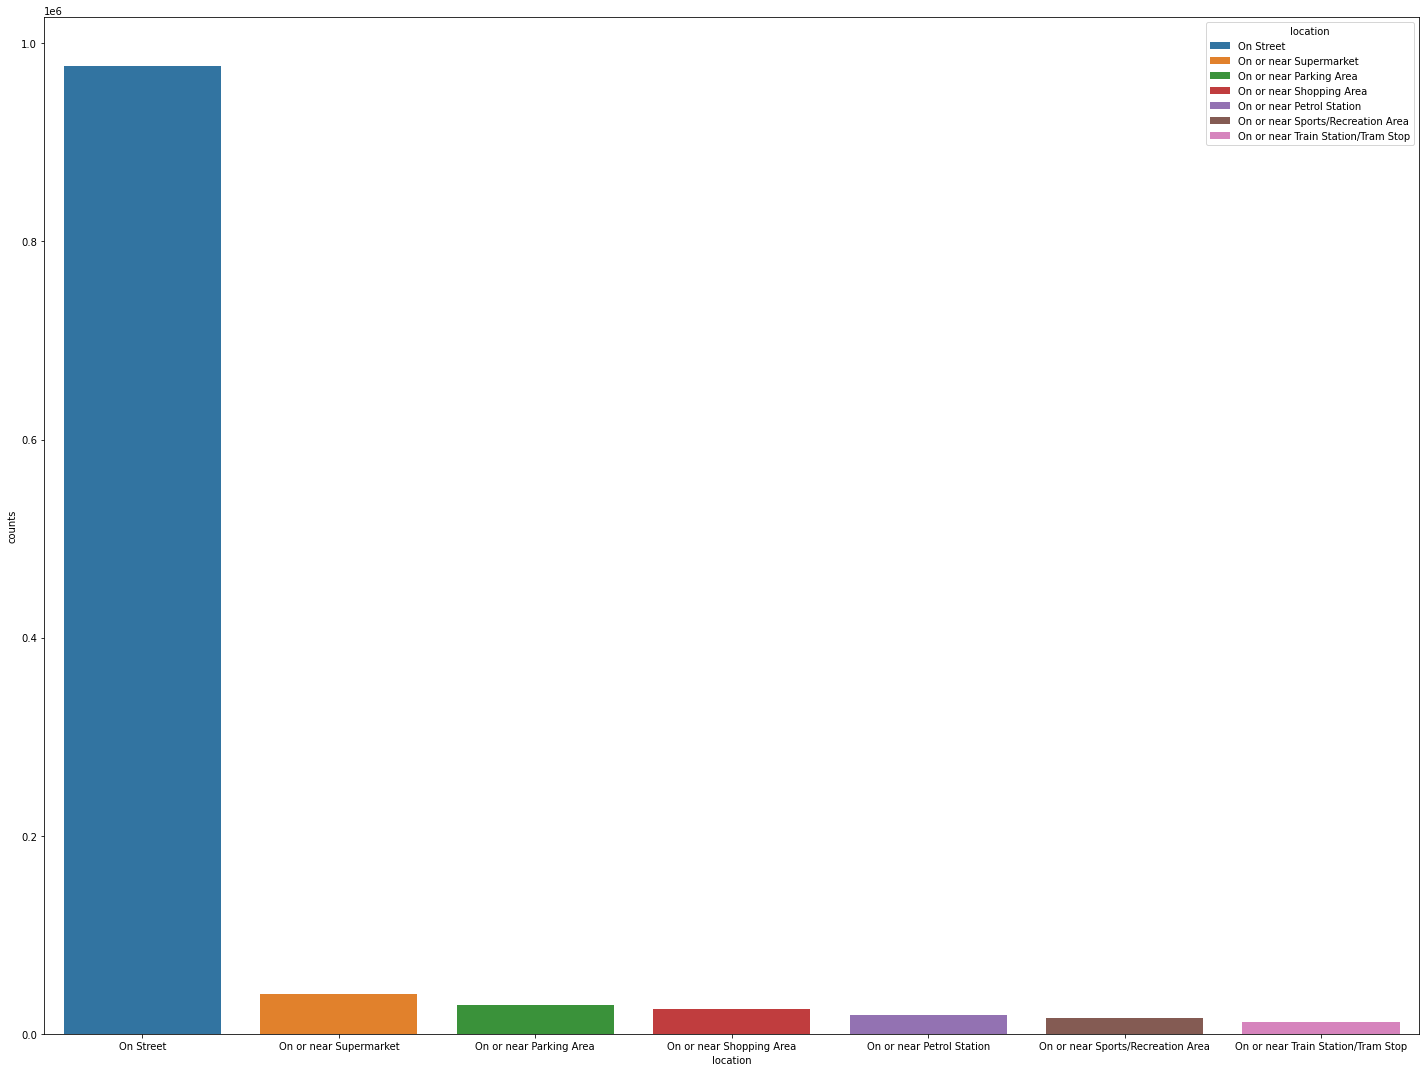

In [34]:
# Show Top 7 locations for crimes
top_seven = location_type_counts.iloc[0:7]
ax = sns.barplot(x='location', y='counts', hue='location', data=top_seven, dodge=False)

plt.show()

In [35]:
# Group dataframe by location type
loc_grp=df.groupby(['Location type'])

In [36]:
# Show percentage of crime types by location "On or near Parking Area"
loc_grp['Crime type'].value_counts(normalize=True).loc['On or near Parking Area']

Crime type
Anti-social behaviour           0.247904
Violence and sexual offences    0.184683
Other theft                     0.100673
Vehicle crime                   0.080607
Shoplifting                     0.080264
Public order                    0.057930
Theft from the person           0.053807
Drugs                           0.052364
Criminal damage and arson       0.041163
Burglary                        0.036524
Robbery                         0.026319
Bicycle theft                   0.025495
Other crime                     0.007628
Possession of weapons           0.004639
Name: Crime type, dtype: float64

In [37]:
# Create a new table grouped by season and location types
table_location = df.groupby(by=['Season','Location type']).count()

In [38]:
table_location

Crime ID   Month  \
Season Location type                                                      
Fall   On Street                                         163813  232090   
       On or near Airport/Airfield                          206     257   
       On or near Bus/Coach Station                         440     580   
       On or near Conference/Exhibition Centre              545     724   
       On or near Further/Higher Educational Building      1383    1806   
...                                                         ...     ...   
Winter On or near Sports/Recreation Area                   2051    3464   
       On or near Supermarket                              6788    8612   
       On or near Theatre/Concert Hall                      606     999   
       On or near Train Station/Tram Stop                     0    2074   
       On or near Underpass                                1306    2013   

                                                       Reported by  \
Season Location type                                                 
Fall   On Street                                            232090   
       On or near Airport/Airfield                             257   
       On or near Bus/Coach Station                            580   
       On or near Conference/Exhibition Centre                 724   
       On or near Further/Higher Educational Building         1806   
...                                                            ...   
Winter On or near Sports/Recreation Area                      3464   
       On or near Supermarket                                 8612   
       On or near Theatre/Concert Hall                         999   
       On or near Train Station/Tram Stop                     2074   
       On or near Underpass                                   2013   

                                                       Falls within  \
Season Location type                                                  
Fall   On Street                                             232090   
       On or near Airport/Airfield                              257   
       On or near Bus/Coach Station                             580   
       On or near Conference/Exhibition Centre                  724   
       On or near Further/Higher Educational Building          1806   
...                                                             ...   
Winter On or near Sports/Recreation Area                       3464   
       On or near Supermarket                                  8612   
       On or near Theatre/Concert Hall                          999   
       On or near Train Station/Tram Stop                      2074   
       On or near Underpass                                    2013   

                                                       Longitude  Latitude  \
Season Location type                                                         
Fall   On Street                                          232090    232090   
       On or near Airport/Airfield                           257       257   
       On or near Bus/Coach Station                          580       580   
       On or near Conference/Exhibition Centre               724       724   
       On or near Further/Higher Educational Building       1806      1806   
...                                                          ...       ...   
Winter On or near Sports/Recreation Area                    3464      3464   
       On or near Supermarket                               8612      8612   
       On or near Theatre/Concert Hall                       999       999   
       On or near Train Station/Tram Stop                   2074      2074   
       On or near Underpass                                 2013      2013   

                                                       Location  LSOA code  \
Season Location type                                                         
Fall   On Street                                         232090     23209

In [49]:
# Create a pivot table of crime locations aggregated by season and directly order the seasons correctly.
df_pivot_location = pd.pivot_table(df, values='Reported by', index='Season', columns='Location type', aggfunc='count')
df_pivot_location = df_pivot_location.reindex(index=['Spring','Summer','Fall','Winter'])
df_pivot_location

Location type  On Street  On or near Airport/Airfield  \
Season                                                  
Spring            227968                          198   
Summer            230072                          228   
Fall              232090                          257   
Winter            215255                          183   

Location type  On or near Bus/Coach Station  \
Season                                        
Spring                                  487   
Summer                                  547   
Fall                                    580   
Winter                                  455   

Location type  On or near Conference/Exhibition Centre  \
Season                                                   
Spring                                             629   
Summer                                             696   
Fall                                               724   
Winter                                             642   

Location type  On or near Further/Higher Educational Building  \
Season                                                          
Spring                                                   1495   
Summer                                                   1600   
Fall                                                     1806   
Winter                                                   1314   

Location type  On or near Hospital  On or near London Underground Station  \
Season                                                                      
Spring                        1621                                   1669   
Summer                        1597                                   1972   
Fall                          1555                                   2048   
Winter                        1287                                   1247   

Location type  On or near Meridian Square  On or near Nightclub  \
Season                                                            
Spring                                338                  1723   
Summer                                561                  3128   
Fall                                  631                  2990   
Winter                                221                  1356   

Location type  On or near Park/Open Space  On or near Parking Area  \
Season                                                               
Spring                                638                     6404   
Summer                                567                     7059   
Fall                                  597                     7083   
Winter                                513                     5992   

Location type  On or near Petrol Station  On or near Police Station  \
Season                                                                
Spring                              4365                       1485   
Summer                              4478                       1572   
Fall                                4622                       1580   
Winter                              3979                       1302   

Location type  On or near Shopping Area  On or near Sports/Recreation Area  \
Season                                                                       
Spring                             5177                               3667   
Summer                             6934                               3791   
Fall                               6194                               3785   
Winter                             4372                               3464   

Location type  On or near Supermarket  On or near Theatre/Concert Hall  \
Season                                                                   
Spring                           9217                             1177   
Summer                           9567                             1764   
Fall                             9818                             1702   
Winter                           8612                              999   

Locati

In [45]:
# Import Matplot library to display plots.
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20,15)

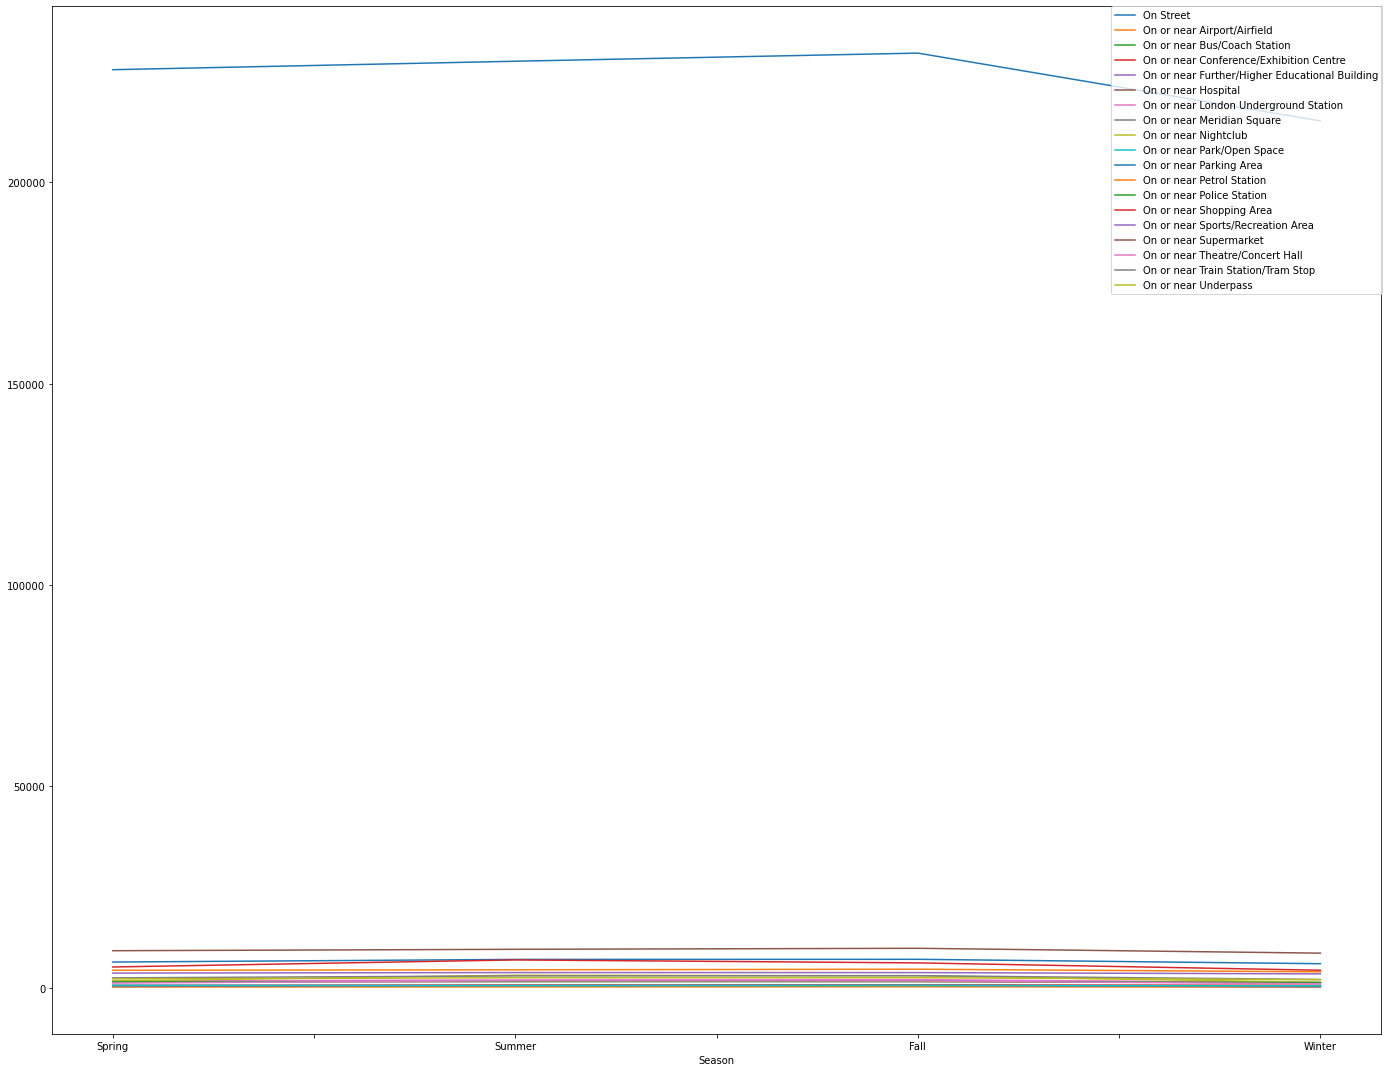

In [43]:
# Create a line chart of crimes at different locations, sorted by seasons.
df_pivot_location.plot()
plt.legend(bbox_to_anchor=(0.797, 1), loc=2, borderaxespad=0.)
plt.show()

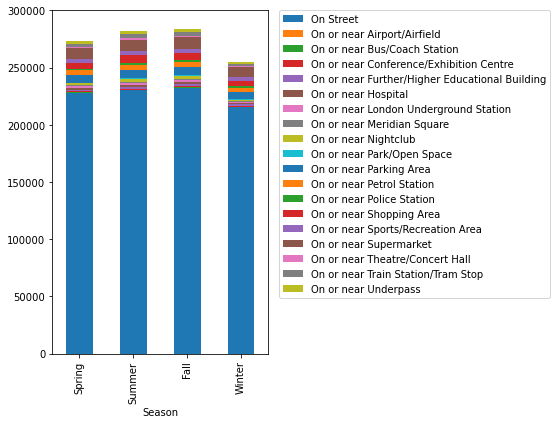

In [46]:
# Create a stacked bar chart of above location types by season.
ax = df_pivot_location.plot.bar(stacked=True, figsize=(8,6))
ax.set_ylim(0,300000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [47]:
# Create a new dataframe that filters out location type "On Street" in order to see the distribution of the other location types better in charts.
df_filt=df.loc[~df['Location type'].str.contains('On Street')]
df_filt

Crime ID       Month  \
15       e8c950bdd3989c2f16866d175893b959884d26fef2d344...  2021-09-01   
16       29fcb6659808379b735abb13c05cbc7c3b283f5b4f4da4...  2021-09-01   
18       c653ee4dae48f2fba6ac7abb821976247dcf4b16e4e02d...  2021-09-01   
34       37dcecab173bc9095a7e3678b04e9228e92a1544fcdf00...  2021-09-01   
35       f317fb3d36fffcf1229ea6703445ffd6ffcf86b74b6190...  2021-09-01   
...                                                    ...         ...   
1183956                                                NaN  2020-11-01   
1183957                                                NaN  2020-11-01   
1183958                                                NaN  2020-11-01   
1183959                                                NaN  2020-11-01   
1183960                                                NaN  2020-11-01   

                         Reported by                 Falls within  Longitude  \
15       Metropolitan Police Service  Metropolitan Police Service   0.137065   
16       Metropolitan Police Service  Metropolitan Police Service   0.137065   
18       Metropolitan Police Service  Metropolitan Police Service   0.137065   
34       Metropolitan Police Service  Metropolitan Police Service   0.135071   
35       Metropolitan Police Service  Metropolitan Police Service   0.135071   
...                              ...                          ...        ...   
1183956     British Transport Police     British Transport Police  -0.133463   
1183957     British Transport Police     British Transport Police  -0.505346   
1183958     British Transport Police     British Transport Police  -0.505346   
1183959     British Transport Police     British Transport Police  -0.505346   
1183960     British Transport Police     British Transport Police  -0.505346   

          Latitude                           Location  LSOA code  \
15       51.583672          On or near Police Station  E01000027   
16       51.583672          On or near Police Station  E01000027   
18       51.583672          On or near Police Station  E01000027   
34       51.581154       On or near Pedestrian Subway  E01000029   
35       51.581154       On or near Pedestrian Subway  E01000029   
...            ...                                ...        ...   
1183956  51.489300    On or near Pimlico (Lu Station)  E01004741   
1183957  51.339500  On or near West Byfleet (Station)  E01031004   
1183958  51.339500  On or near West Byfleet (Station)  E01031004   
1183959  51.339500  On or near West Byfleet (Station)  E01031004   
1183960  51.339500  On or near West Byfleet (Station)  E01031004   

                         LSOA name                    Crime type  \
15       Barking and Dagenham 001A  Violence and sexual offences   
16       Barking and Dagenham 001A  Violence and sexual offences   
18       Barking and Dagenham 001A  Violence and sexual offences   
34       Barking and Dagenham 001C     Criminal damage and arson   
35       Barking and Dagenham 001C     Criminal damage and arson   
...                            ...                           ...   
1183956           Westminster 024F  Violence and sexual offences   
1183957                Woking 002E                 Bicycle theft   
1183958                Woking 002E                 Bicycle theft   
1183959                Woking 002E                  Public order   
1183960                Woking 002E                 Vehicle crime   

                                 Last outcome category  Context  \
15                                 Under investigation      NaN   
16       Investigation complete; no suspect identified      NaN   
18                                 Under investigation      NaN   
34       Investigation complete; no suspect identified      NaN   
35                                 Under investigation      NaN   
...                                                ...      ...   
1183956                                            NaN      NaN   
1183957                       

In [51]:
# Create a new pivot table of crime locations aggregated by season with the filtered dataframe
df_pivot_location_filt = pd.pivot_table(df_filt, values='Reported by', index='Season', columns='Location type', aggfunc='count')
df_pivot_location_filt = df_pivot_location_filt.reindex(index=['Spring','Summer','Fall','Winter'])
df_pivot_location_filt

Location type  On or near Airport/Airfield  On or near Bus/Coach Station  \
Season                                                                     
Spring                                 198                           487   
Summer                                 228                           547   
Fall                                   257                           580   
Winter                                 183                           455   

Location type  On or near Conference/Exhibition Centre  \
Season                                                   
Spring                                             629   
Summer                                             696   
Fall                                               724   
Winter                                             642   

Location type  On or near Further/Higher Educational Building  \
Season                                                          
Spring                                                   1495   
Summer                                                   1600   
Fall                                                     1806   
Winter                                                   1314   

Location type  On or near Hospital  On or near London Underground Station  \
Season                                                                      
Spring                        1621                                   1669   
Summer                        1597                                   1972   
Fall                          1555                                   2048   
Winter                        1287                                   1247   

Location type  On or near Meridian Square  On or near Nightclub  \
Season                                                            
Spring                                338                  1723   
Summer                                561                  3128   
Fall                                  631                  2990   
Winter                                221                  1356   

Location type  On or near Park/Open Space  On or near Parking Area  \
Season                                                               
Spring                                638                     6404   
Summer                                567                     7059   
Fall                                  597                     7083   
Winter                                513                     5992   

Location type  On or near Petrol Station  On or near Police Station  \
Season                                                                
Spring                              4365                       1485   
Summer                              4478                       1572   
Fall                                4622                       1580   
Winter                              3979                       1302   

Location type  On or near Shopping Area  On or near Sports/Recreation Area  \
Season                                                                       
Spring                             5177                               3667   
Summer                             6934                               3791   
Fall                               6194                               3785   
Winter                             4372                               3464   

Location type  On or near Supermarket  On or near Theatre/Concert Hall  \
Season                                                                   
Spring                           9217                             1177   
Summer                           9567                             1764   
Fall                             9818                             1702   
Winter                           8612                              999   

Location type  On or near Train Station/Tram Stop  On or near Underpass  
Season                                                                   
Spring                     

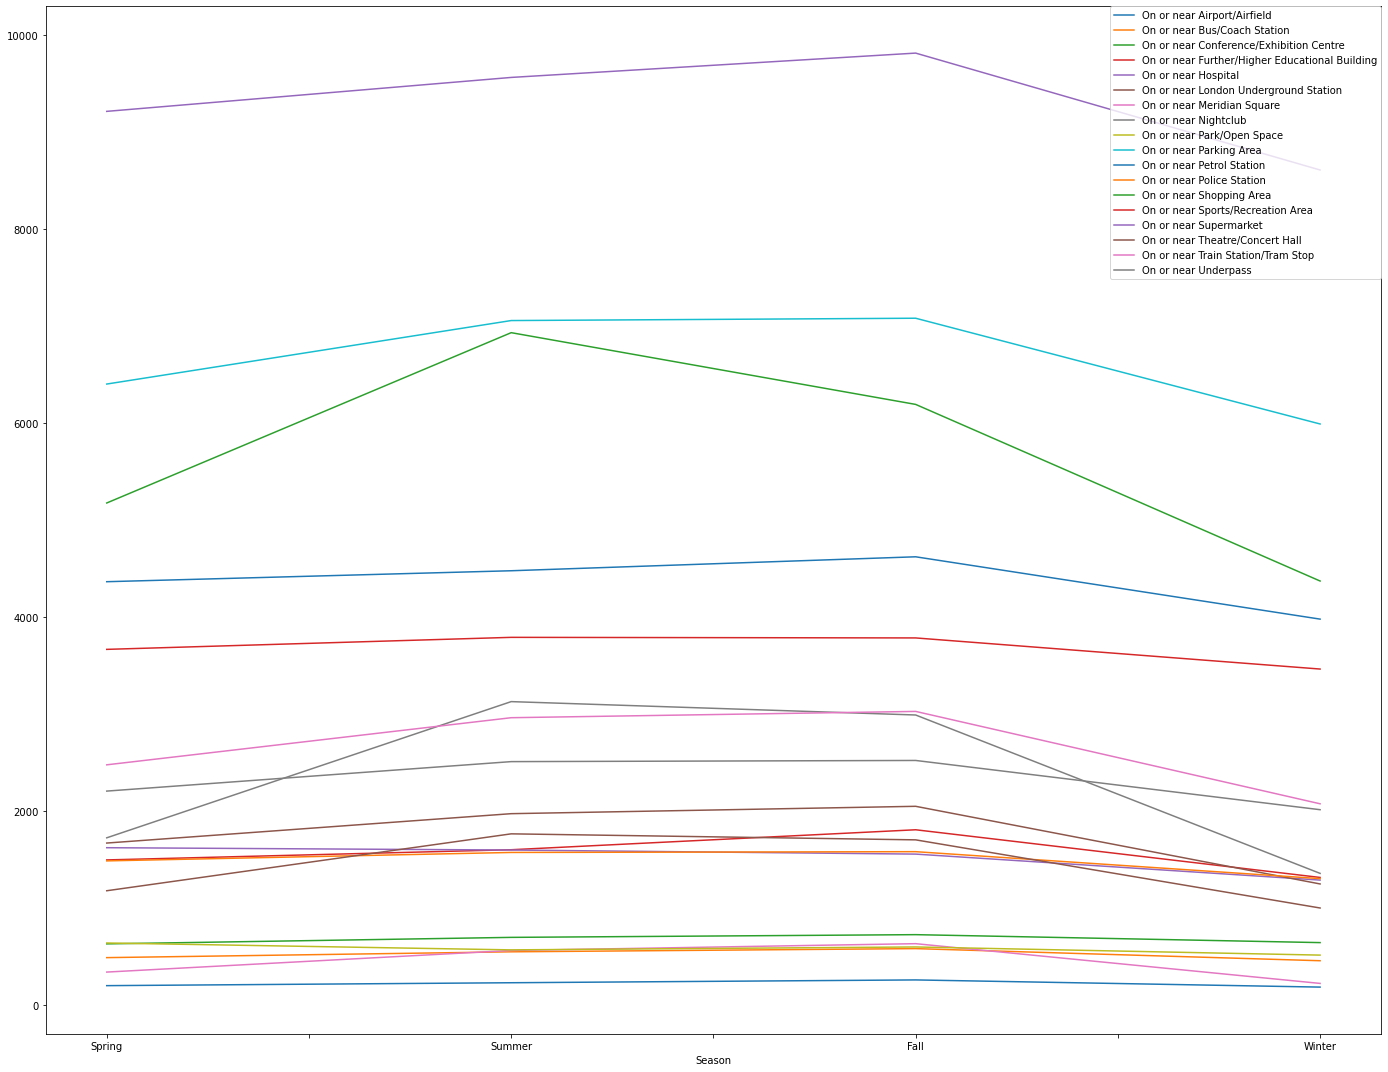

In [52]:
# Create another line chart of crimes at different locations, sorted by seasons. This time "On Street" is filtered out to better analyze the other location types.
df_pivot_location_filt.plot()
plt.legend(bbox_to_anchor=(0.797, 1), loc=2, borderaxespad=0.)
plt.show()

In [53]:
# Create a pivot table of crime count by crime and location type
df_pivot_crime_loc = pd.pivot_table(df, values='Reported by', index='Location type', columns='Crime type', aggfunc='count')
df_pivot_crime_loc

Crime type                                      Anti-social behaviour  \
Location type                                                           
On Street                                                    310104.0   
On or near Airport/Airfield                                     294.0   
On or near Bus/Coach Station                                    596.0   
On or near Conference/Exhibition Centre                         768.0   
On or near Further/Higher Educational Building                 1716.0   
On or near Hospital                                             878.0   
On or near London Underground Station                             NaN   
On or near Meridian Square                                      117.0   
On or near Nightclub                                           1592.0   
On or near Park/Open Space                                      763.0   
On or near Parking Area                                        7215.0   
On or near Petrol Station                                      3565.0   
On or near Police Station                                      1521.0   
On or near Shopping Area                                       3352.0   
On or near Sports/Recreation Area                              5032.0   
On or near Supermarket                                         7065.0   
On or near Theatre/Concert Hall                                1627.0   
On or near Train Station/Tram Stop                                NaN   
On or near Underpass                                           2678.0   

Crime type                                      Bicycle theft  Burglary  \
Location type                                                             
On Street                                             18003.0   51727.0   
On or near Airport/Airfield                               1.0       2.0   
On or near Bus/Coach Station                             74.0      67.0   
On or near Conference/Exhibition Centre                 149.0     126.0   
On or near Further/Higher Educational Building          374.0     318.0   
On or near Hospital                                     280.0     187.0   
On or near London Underground Station                   137.0      15.0   
On or near Meridian Square                               44.0      20.0   
On or near Nightclub                                    274.0     331.0   
On or near Park/Open Space                               67.0     107.0   
On or near Parking Area                                 742.0    1063.0   
On or near Petrol Station                               244.0     622.0   
On or near Police Station                                82.0     146.0   
On or near Shopping Area                                705.0     582.0   
On or near Sports/Recreation Area                       259.0     666.0   
On or near Supermarket                                 1248.0    1221.0   
On or near Theatre/Concert Hall                         254.0     231.0   
On or near Train Station/Tram Stop                      973.0      42.0   
On or near Underpass                                    241.0     342.0   

Crime type                                      Criminal damage and arson  \
Location type                                                               
On Street                                                         48652.0   
On or near Airport/Airfield                                          11.0   
On or near Bus/Coach Station                                        104.0   
On or near Conference/Exhibition Centre                             100.0   
On or near Further/Higher Educational Building                      254.0   
On or near Hospital                                                 449.0   
On or near London Underground Station                               442.0   
On or near Meridian Square                                           13.0   
On or near Nightclub                                                369.0   
On or near Park/Open Space                 

(0.0, 1000000.0)

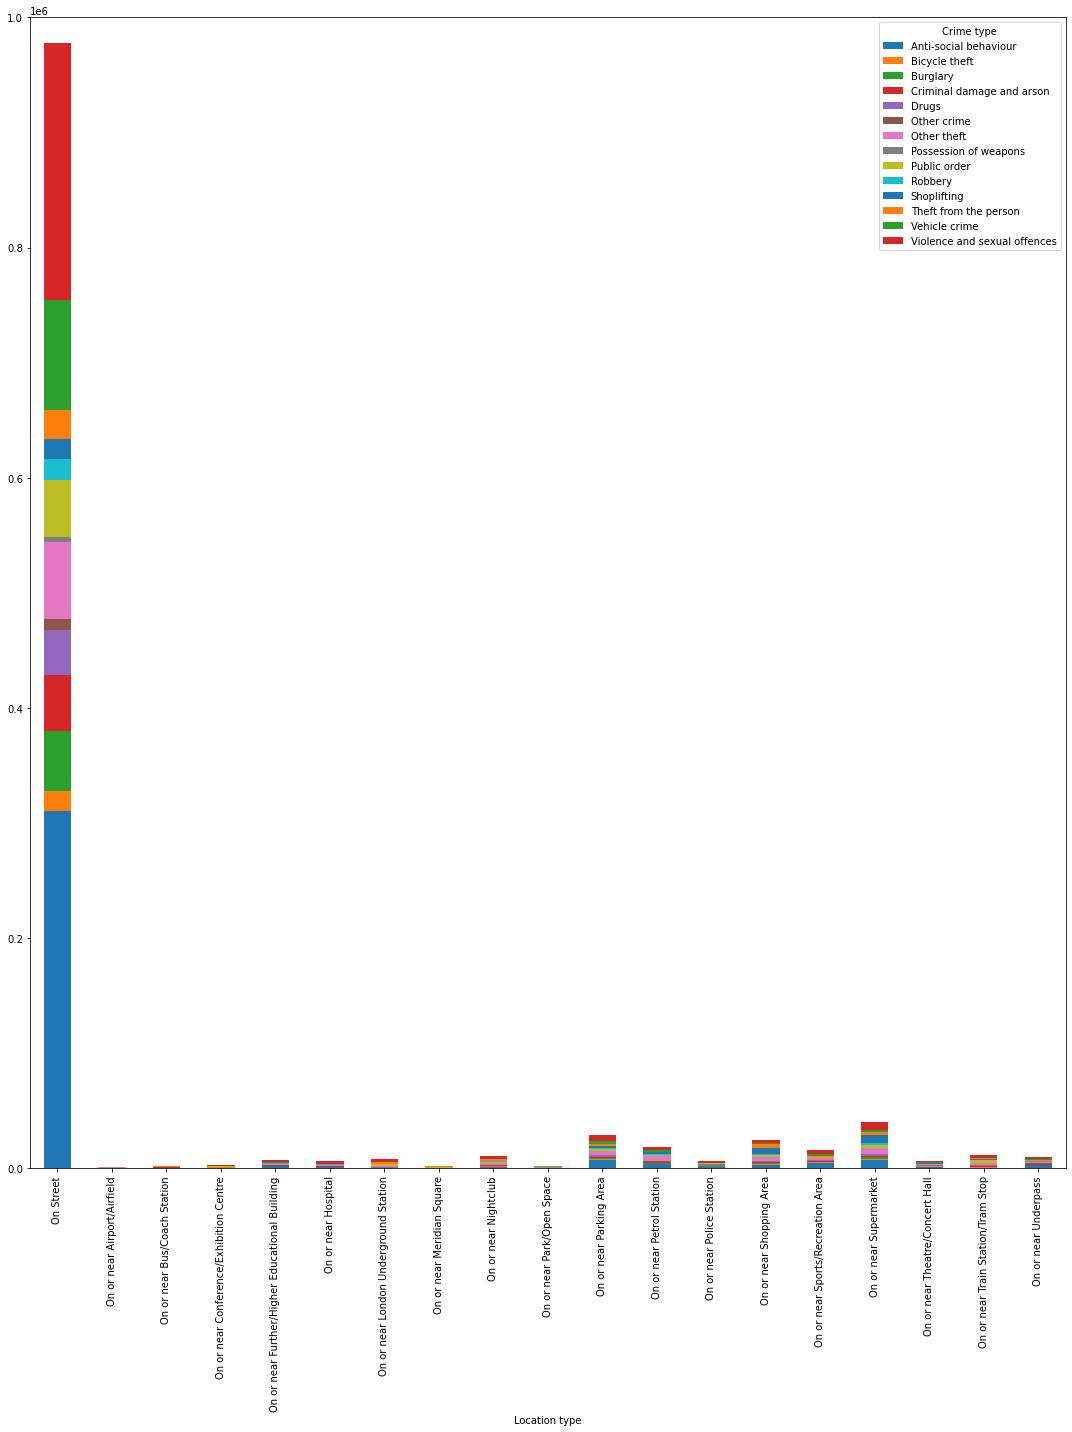

In [54]:
# Create a stacked bar chart of crime types by location type.
ax = df_pivot_crime_loc.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,1000000)

In [55]:
# Create a new pivot table with the filtered dataframe (without "On Street") of crime counts by crime and location type
df_pivot_crime_loc_filt = pd.pivot_table(df_filt, values='Reported by', index='Location type', columns='Crime type', aggfunc='count')
df_pivot_crime_loc_filt

Crime type                                      Anti-social behaviour  \
Location type                                                           
On or near Airport/Airfield                                     294.0   
On or near Bus/Coach Station                                    596.0   
On or near Conference/Exhibition Centre                         768.0   
On or near Further/Higher Educational Building                 1716.0   
On or near Hospital                                             878.0   
On or near London Underground Station                             NaN   
On or near Meridian Square                                      117.0   
On or near Nightclub                                           1592.0   
On or near Park/Open Space                                      763.0   
On or near Parking Area                                        7215.0   
On or near Petrol Station                                      3565.0   
On or near Police Station                                      1521.0   
On or near Shopping Area                                       3352.0   
On or near Sports/Recreation Area                              5032.0   
On or near Supermarket                                         7065.0   
On or near Theatre/Concert Hall                                1627.0   
On or near Train Station/Tram Stop                                NaN   
On or near Underpass                                           2678.0   

Crime type                                      Bicycle theft  Burglary  \
Location type                                                             
On or near Airport/Airfield                               1.0       2.0   
On or near Bus/Coach Station                             74.0      67.0   
On or near Conference/Exhibition Centre                 149.0     126.0   
On or near Further/Higher Educational Building          374.0     318.0   
On or near Hospital                                     280.0     187.0   
On or near London Underground Station                   137.0      15.0   
On or near Meridian Square                               44.0      20.0   
On or near Nightclub                                    274.0     331.0   
On or near Park/Open Space                               67.0     107.0   
On or near Parking Area                                 742.0    1063.0   
On or near Petrol Station                               244.0     622.0   
On or near Police Station                                82.0     146.0   
On or near Shopping Area                                705.0     582.0   
On or near Sports/Recreation Area                       259.0     666.0   
On or near Supermarket                                 1248.0    1221.0   
On or near Theatre/Concert Hall                         254.0     231.0   
On or near Train Station/Tram Stop                      973.0      42.0   
On or near Underpass                                    241.0     342.0   

Crime type                                      Criminal damage and arson  \
Location type                                                               
On or near Airport/Airfield                                          11.0   
On or near Bus/Coach Station                                        104.0   
On or near Conference/Exhibition Centre                             100.0   
On or near Further/Higher Educational Building                      254.0   
On or near Hospital                                                 449.0   
On or near London Underground Station                               442.0   
On or near Meridian Square                                           13.0   
On or near Nightclub                                                369.0   
On or near Park/Open Space                                          101.0   
On or near Parking Area                                            1198.0   
On or near Petrol Station                                           837.0   
On or near Police Station            

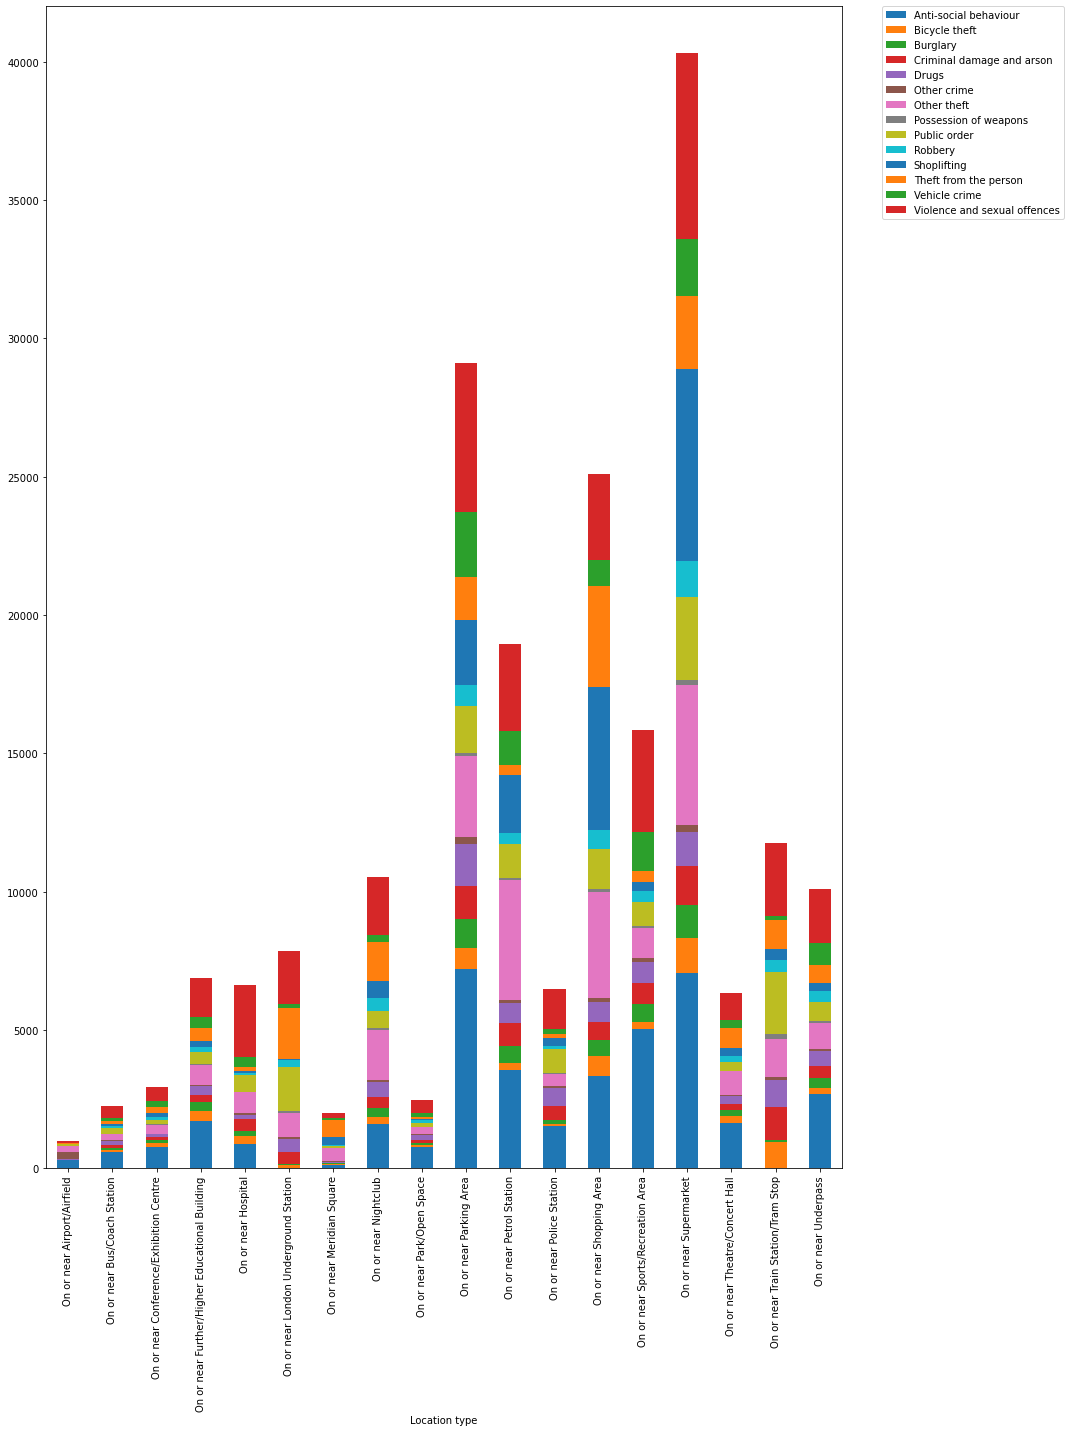

In [58]:
# Create a new stacked bar chart of crime types by location type.
ax = df_pivot_crime_loc_filt.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,42000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [59]:
# Analysis on last outcome category

In [60]:
# Create a pivot table wich shows how crime type and last outcome category are connected
df_pivot_outcome = pd.pivot_table(df, values='Reported by', index='Crime type', columns='Last outcome category', aggfunc='count')
df_pivot_outcome

Last outcome category         Action to be taken by another organisation  \
Crime type                                                                 
Bicycle theft                                                        NaN   
Burglary                                                             NaN   
Criminal damage and arson                                            NaN   
Drugs                                                                NaN   
Other crime                                                          5.0   
Other theft                                                          2.0   
Possession of weapons                                                NaN   
Public order                                                         2.0   
Robbery                                                              NaN   
Shoplifting                                                          NaN   
Theft from the person                                                NaN   
Vehicle crime                                                        NaN   
Violence and sexual offences                                        11.0   

Last outcome category         Awaiting court outcome  \
Crime type                                             
Bicycle theft                                  119.0   
Burglary                                      1220.0   
Criminal damage and arson                     1179.0   
Drugs                                         4009.0   
Other crime                                    501.0   
Other theft                                    270.0   
Possession of weapons                         1078.0   
Public order                                  1875.0   
Robbery                                        734.0   
Shoplifting                                   1238.0   
Theft from the person                          199.0   
Vehicle crime                                  482.0   
Violence and sexual offences                  5531.0   

Last outcome category         Court result unavailable  \
Crime type                                               
Bicycle theft                                     71.0   
Burglary                                         823.0   
Criminal damage and arson                       1134.0   
Drugs                                           4219.0   
Other crime                                      536.0   
Other theft                                      204.0   
Possession of weapons                           1097.0   
Public order                                    1466.0   
Robbery                                          488.0   
Shoplifting                                     1148.0   
Theft from the person                             98.0   
Vehicle crime                                    441.0   
Violence and sexual offences                    4134.0   

Last outcome category         Formal action is not in the public interest  \
Crime type                                                                  
Bicycle theft                                                         1.0   
Burglary                                                              1.0   
Criminal damage and arson                                             6.0   
Drugs                                                                49.0   
Other crime                                                           9.0   
Other theft                                                           5.0   
Possession of weapons                                                 7.0   
Public order                                                         27.0   
Robbery                                                               2.0   
Shoplifting                                                          20.0   
Theft from the person                                                 3.0   
Vehicle crime                                                         1.0   
Violence and sexual offences                                         

(0.0, 270000.0)

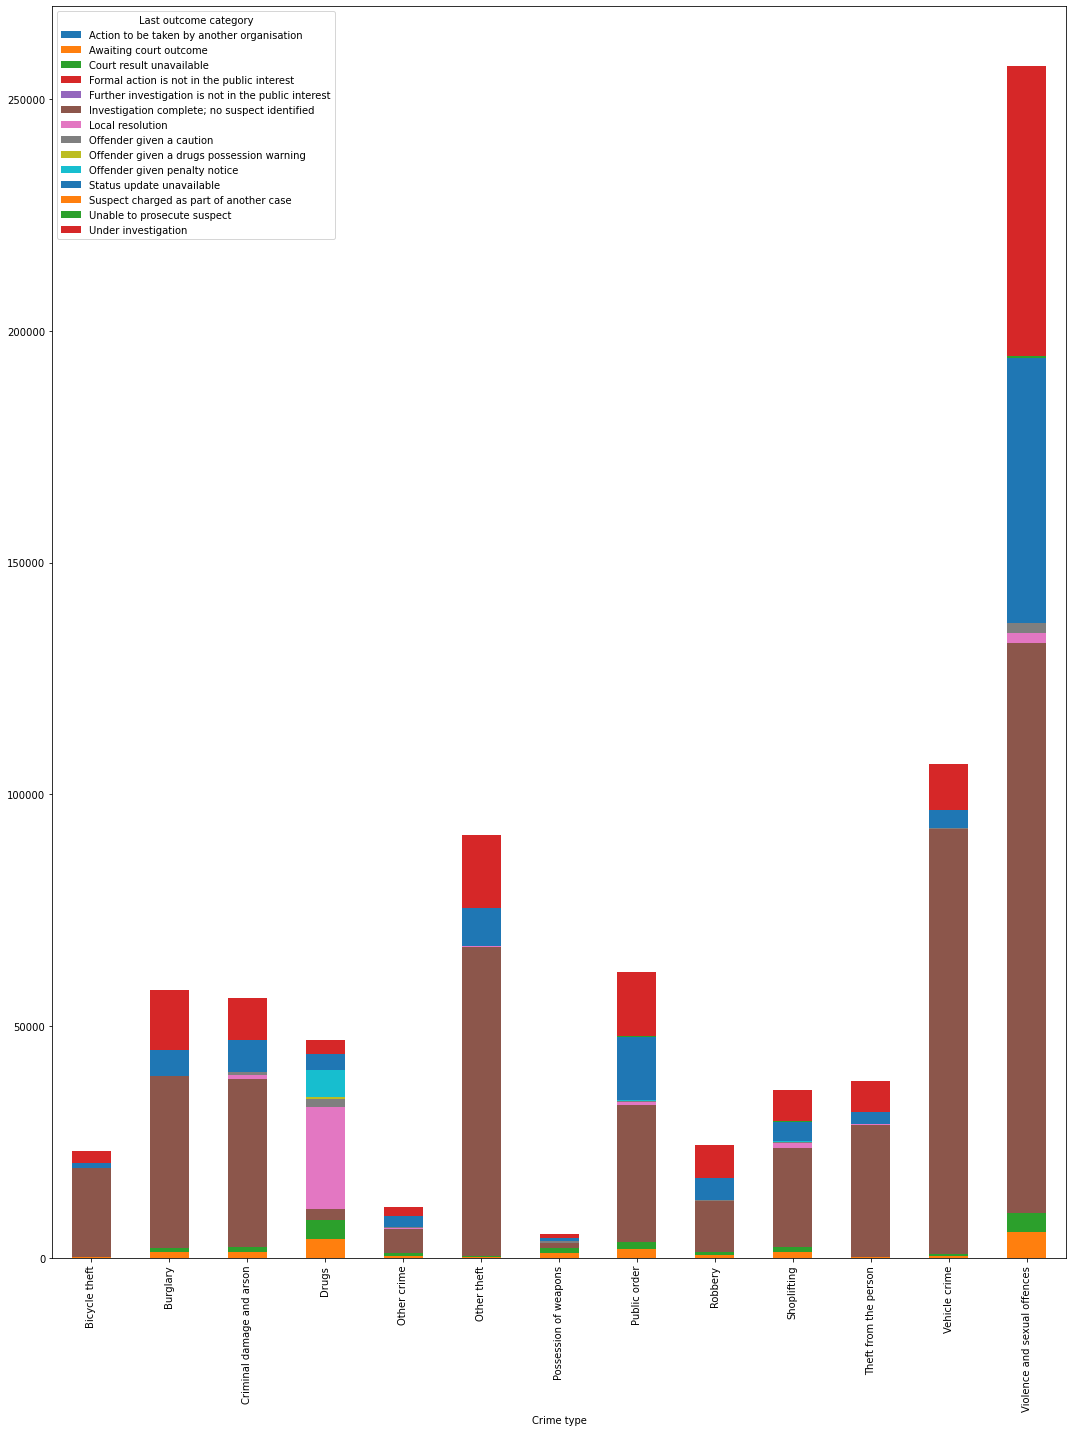

In [61]:
# Create a stacked bar chart of the above last outcome category sorted by crime type.
ax = df_pivot_outcome.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,270000)

In [62]:
# Create a table where data is grouped by crime types and the last outcome category
table = df.groupby(by=['Crime type','Last outcome category']).count()
table

Crime ID  \
Crime type                   Last outcome category                                     
Bicycle theft                Awaiting court outcome                              119   
                             Court result unavailable                             71   
                             Formal action is not in the public interest           1   
                             Investigation complete; no suspect identified     19136   
                             Local resolution                                     33   
...                                                                              ...   
Violence and sexual offences Offender given a drugs possession warning             1   
                             Offender given penalty notice                        24   
                             Status update unavailable                         57197   
                             Unable to prosecute suspect                         251   
                             Under investigation                               62590   

                                                                            Month  \
Crime type                   Last outcome category                                  
Bicycle theft                Awaiting court outcome                           119   
                             Court result unavailable                          71   
                             Formal action is not in the public interest        1   
                             Investigation complete; no suspect identified  19136   
                             Local resolution                                  33   
...                                                                           ...   
Violence and sexual offences Offender given a drugs possession warning          1   
                             Offender given penalty notice                     24   
                             Status update unavailable                      57197   
                             Unable to prosecute suspect                      251   
                             Under investigation                            62590   

                                                                            Reported by  \
Crime type                   Last outcome category                                        
Bicycle theft                Awaiting court outcome                                 119   
                             Court result unavailable                                71   
                             Formal action is not in the public interest              1   
                             Investigation complete; no suspect identified        19136   
                             Local resolution                                        33   
...                                                                                 ...   
Violence and sexual offences Offender given a drugs possession warning                1   
                             Offender given penalty notice                           24   
                             Status update unavailable                            57197   
                             Unable to prosecute suspect                            251   
                             Under investigation                                  62590   

                                                                            Falls within  \
Crime type                   Last outcome category                                         
Bicycle theft                Awaiting court outcome                                  119   
                             Court result unavailable                                 71   
                             Formal action is not in the public interest               1   
                             Investigation complete; no suspect identified         19136   
                             Local resolution                                         33 

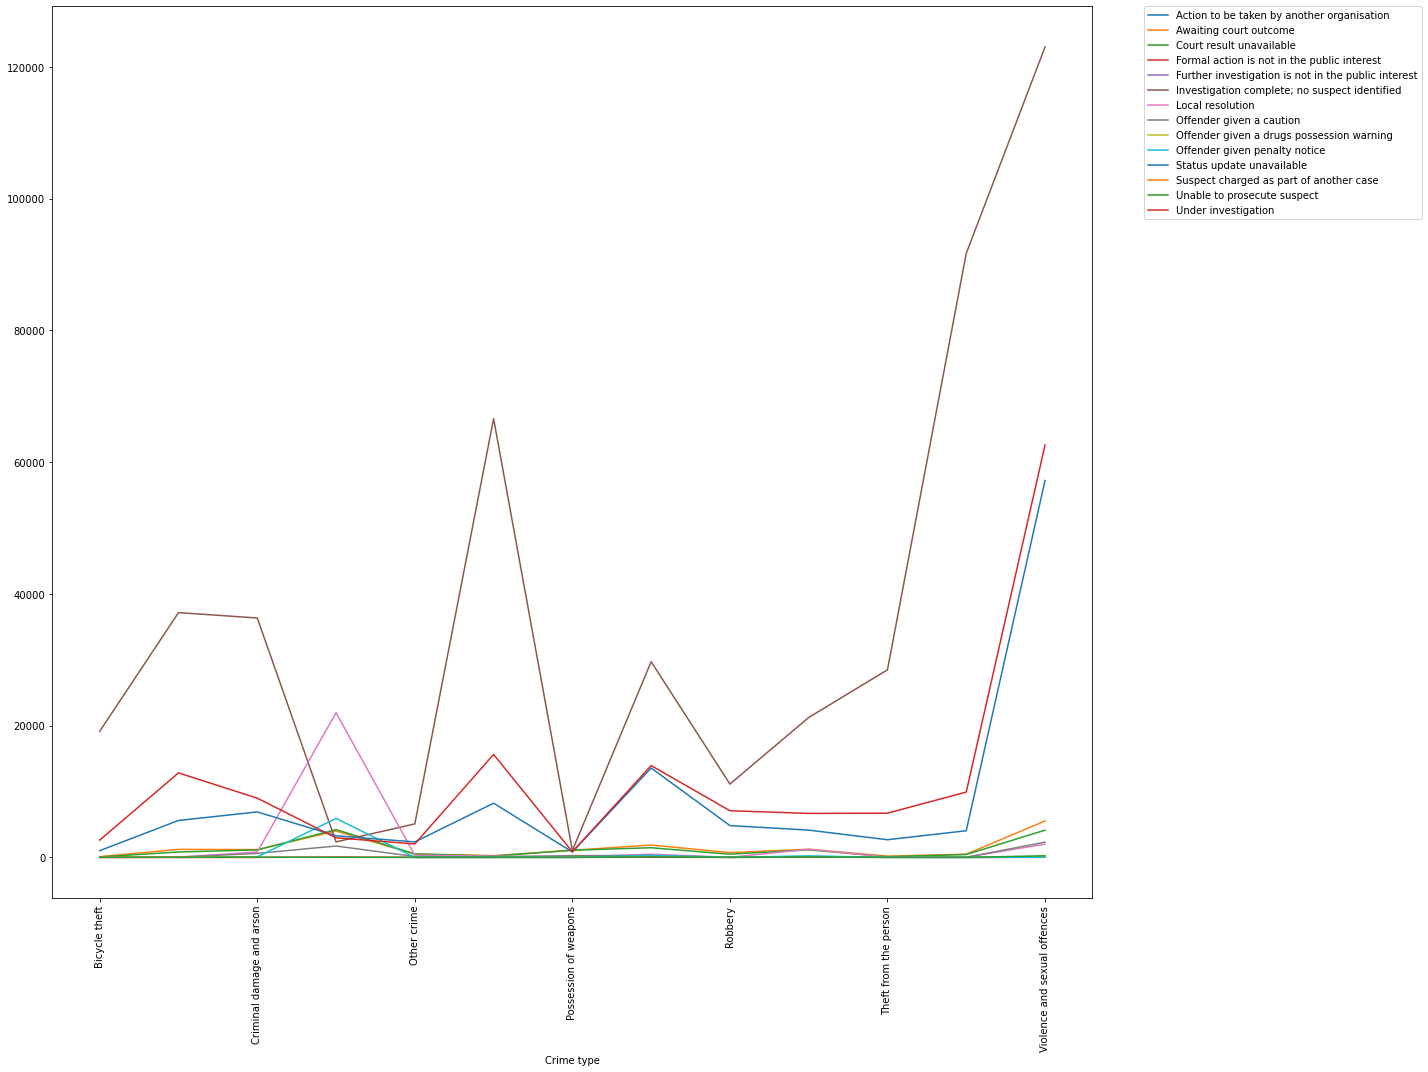

In [63]:
# Create a line chart showing last outcome category by crime type.
df_pivot_outcome.plot()
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [64]:
# Show for which crime type the outcome was "Formal action is not in the public interest"?
df_pivot_outcome['Formal action is not in the public interest']

Crime type
Bicycle theft                    1.0
Burglary                         1.0
Criminal damage and arson        6.0
Drugs                           49.0
Other crime                      9.0
Other theft                      5.0
Possession of weapons            7.0
Public order                    27.0
Robbery                          2.0
Shoplifting                     20.0
Theft from the person            3.0
Vehicle crime                    1.0
Violence and sexual offences    20.0
Name: Formal action is not in the public interest, dtype: float64

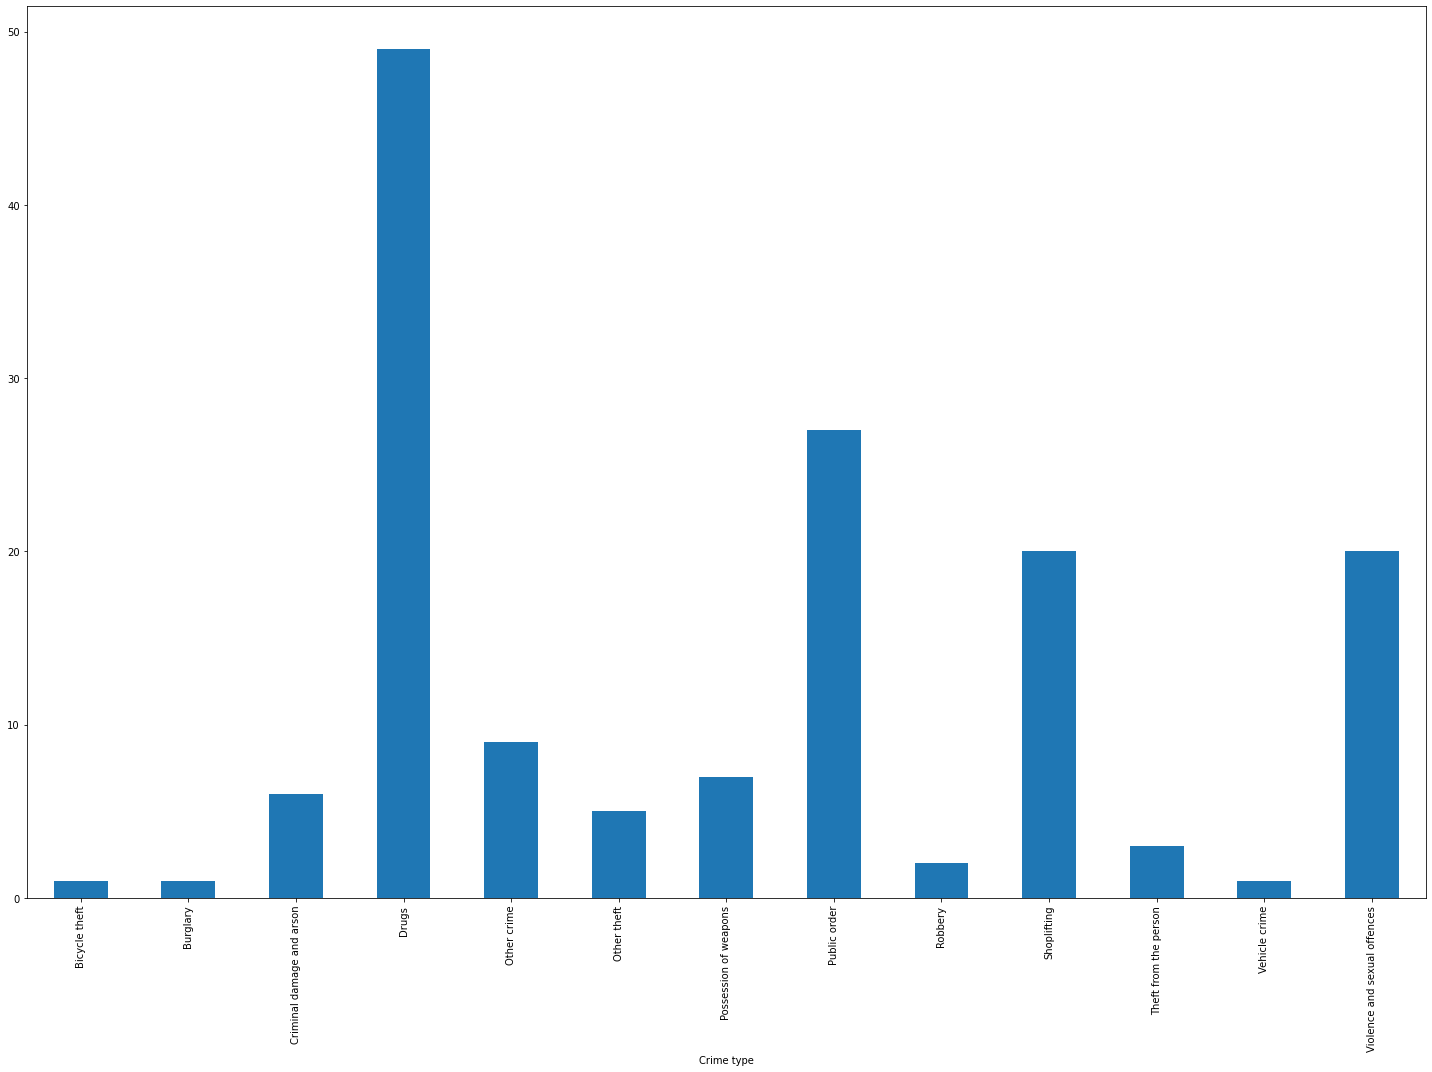

In [65]:
# Show the counts of crimes with outcome "Formal action is not in the public interest".
df_pivot_outcome['Formal action is not in the public interest'].plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

In [66]:
# Create a pivot table which shows how location type and last outcome category are connected
df_pivot1 = pd.pivot_table(df, values='Reported by', index='Location type', columns='Last outcome category', aggfunc='count')
df_pivot1

Last outcome category                           Action to be taken by another organisation  \
Location type                                                                                
On Street                                                                             19.0   
On or near Airport/Airfield                                                            NaN   
On or near Bus/Coach Station                                                           NaN   
On or near Conference/Exhibition Centre                                                1.0   
On or near Further/Higher Educational Building                                         NaN   
On or near Hospital                                                                    NaN   
On or near Meridian Square                                                             NaN   
On or near Nightclub                                                                   NaN   
On or near Park/Open Space                                                             NaN   
On or near Parking Area                                                                NaN   
On or near Petrol Station                                                              NaN   
On or near Police Station                                                              NaN   
On or near Shopping Area                                                               NaN   
On or near Sports/Recreation Area                                                      NaN   
On or near Supermarket                                                                 NaN   
On or near Theatre/Concert Hall                                                        NaN   
On or near Underpass                                                                   NaN   

Last outcome category                           Awaiting court outcome  \
Location type                                                            
On Street                                                      14518.0   
On or near Airport/Airfield                                       38.0   
On or near Bus/Coach Station                                      57.0   
On or near Conference/Exhibition Centre                           46.0   
On or near Further/Higher Educational Building                   108.0   
On or near Hospital                                              149.0   
On or near Meridian Square                                        57.0   
On or near Nightclub                                             247.0   
On or near Park/Open Space                                        36.0   
On or near Parking Area                                          516.0   
On or near Petrol Station                                        364.0   
On or near Police Station                                        481.0   
On or near Shopping Area                                         557.0   
On or near Sports/Recreation Area                                202.0   
On or near Supermarket                                           769.0   
On or near Theatre/Concert Hall                                  133.0   
On or near Underpass                                             157.0   

Last outcome category                           Court result unavailable  \
Location type                                                              
On Street                                                        12633.0   
On or near Airport/Airfield                                         43.0   
On or near Bus/Coach Station                                        37.0   
On or near Conference/Exhibition Centre                             40.0   
On or near Further/Higher Educational Building                     100.0   
On or near Hospital                                                 97.0   
On or near Meridian Square                                          23.0   
On or near Nightclub                                               108.0   
On or near Park/Open Space                    

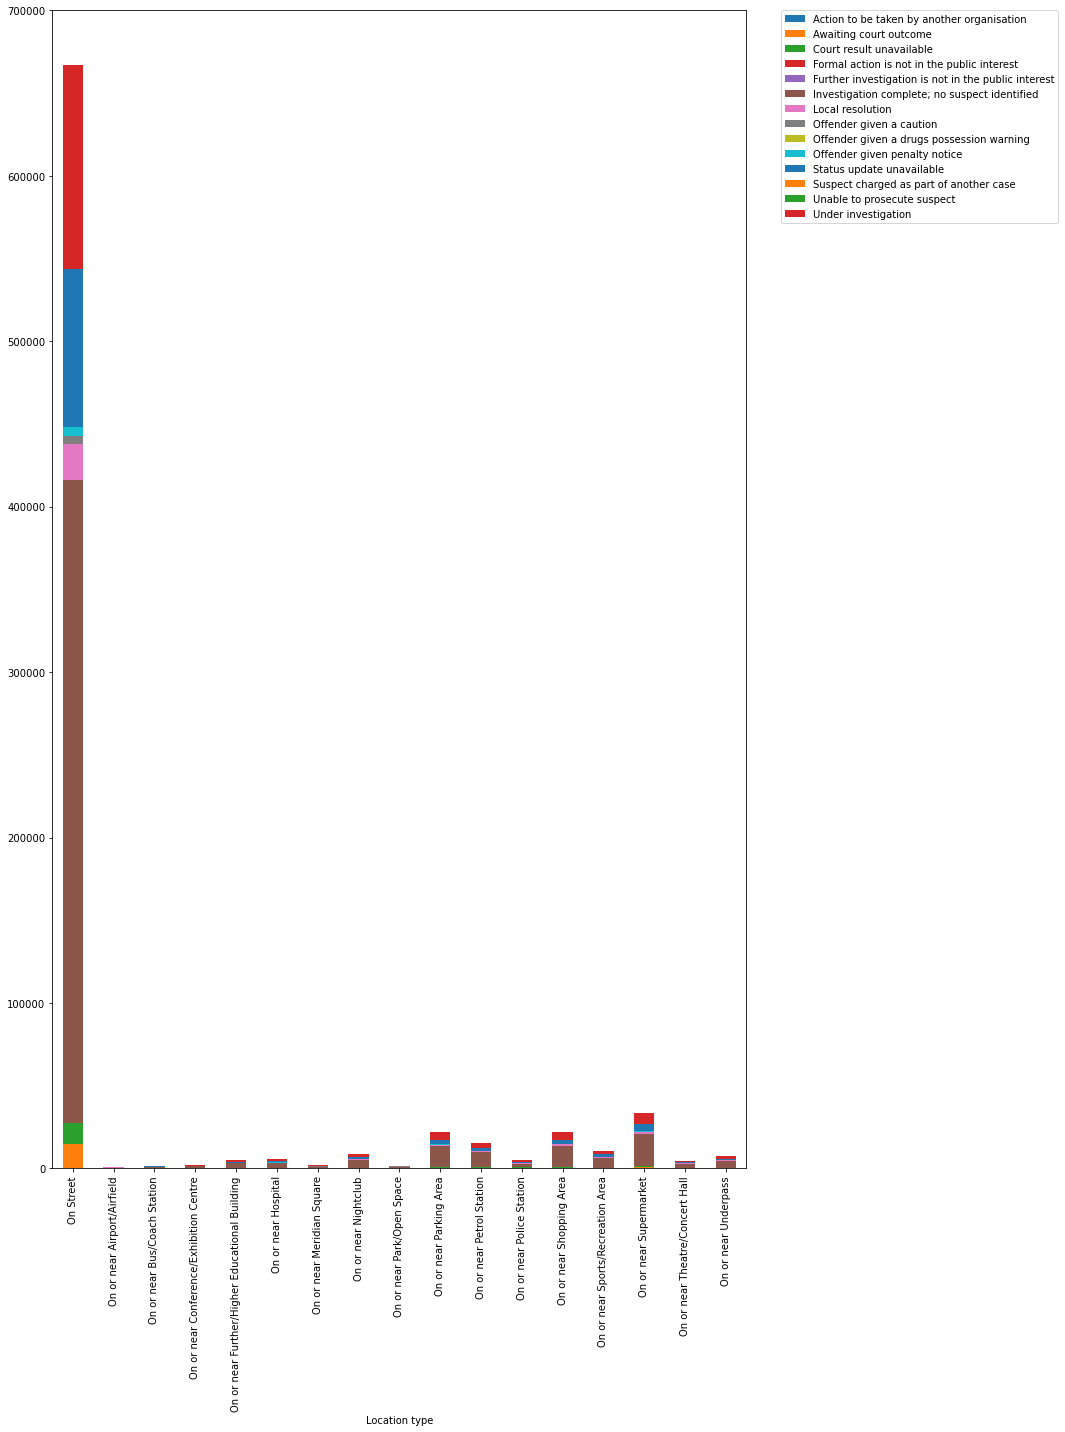

In [67]:
# Create a stacked bar chart of the above last outcome category sorted by location type.
ax = df_pivot1.plot.bar(stacked=True, figsize=(15,20))
ax.set_ylim(0,700000)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [68]:
# Which location type has 'Investigation complete, no suspect identified' as outcome?
df_pivot1['Investigation complete; no suspect identified']

Location type
On Street                                         388786.0
On or near Airport/Airfield                          394.0
On or near Bus/Coach Station                         849.0
On or near Conference/Exhibition Centre             1331.0
On or near Further/Higher Educational Building      2900.0
On or near Hospital                                 3225.0
On or near Meridian Square                           942.0
On or near Nightclub                                4965.0
On or near Park/Open Space                           957.0
On or near Parking Area                            12275.0
On or near Petrol Station                           9252.0
On or near Police Station                           1976.0
On or near Shopping Area                           12815.0
On or near Sports/Recreation Area                   5951.0
On or near Supermarket                             19411.0
On or near Theatre/Concert Hall                     2664.0
On or near Underpass                      

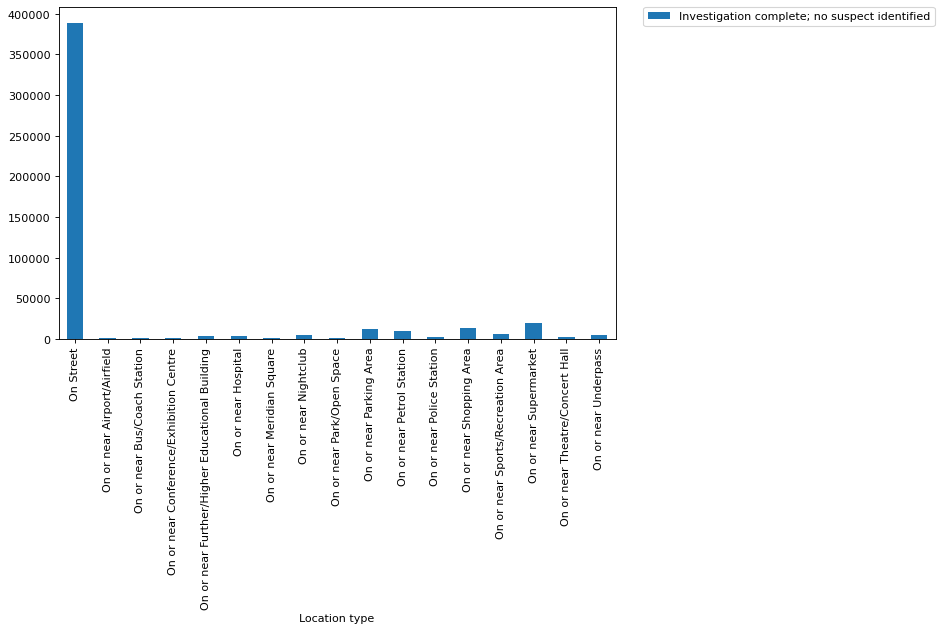

In [69]:
figure(figsize=(12, 8), dpi=80)
df_pivot1['Investigation complete; no suspect identified'].plot(kind="bar")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [71]:
# Which crime type has 'Investigation complete, no suspect identified' as outcome?
df_pivot_outcome['Investigation complete; no suspect identified']

Crime type
Bicycle theft                    19136.0
Burglary                         37154.0
Criminal damage and arson        36333.0
Drugs                             2356.0
Other crime                       5084.0
Other theft                      66585.0
Possession of weapons             1050.0
Public order                     29701.0
Robbery                          11134.0
Shoplifting                      21233.0
Theft from the person            28473.0
Vehicle crime                    91666.0
Violence and sexual offences    123005.0
Name: Investigation complete; no suspect identified, dtype: float64

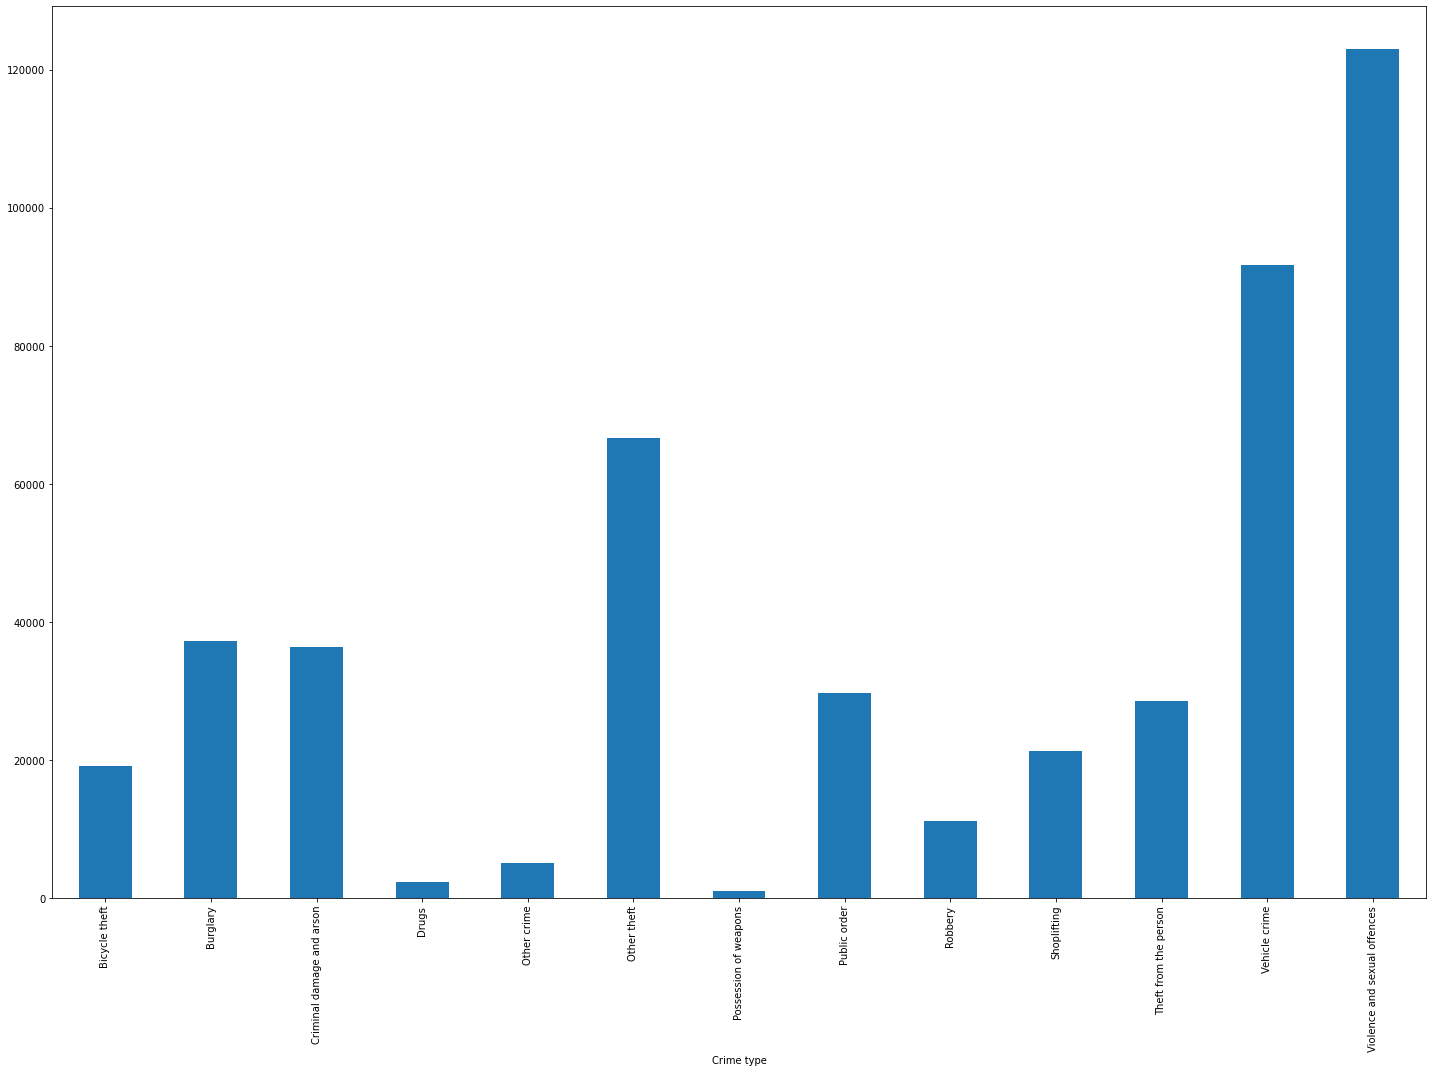

In [72]:
df_pivot_outcome['Investigation complete; no suspect identified'].plot(kind="bar")
plt.xticks(rotation=90)
plt.show()

<Figure size 10000x10000 with 0 Axes>

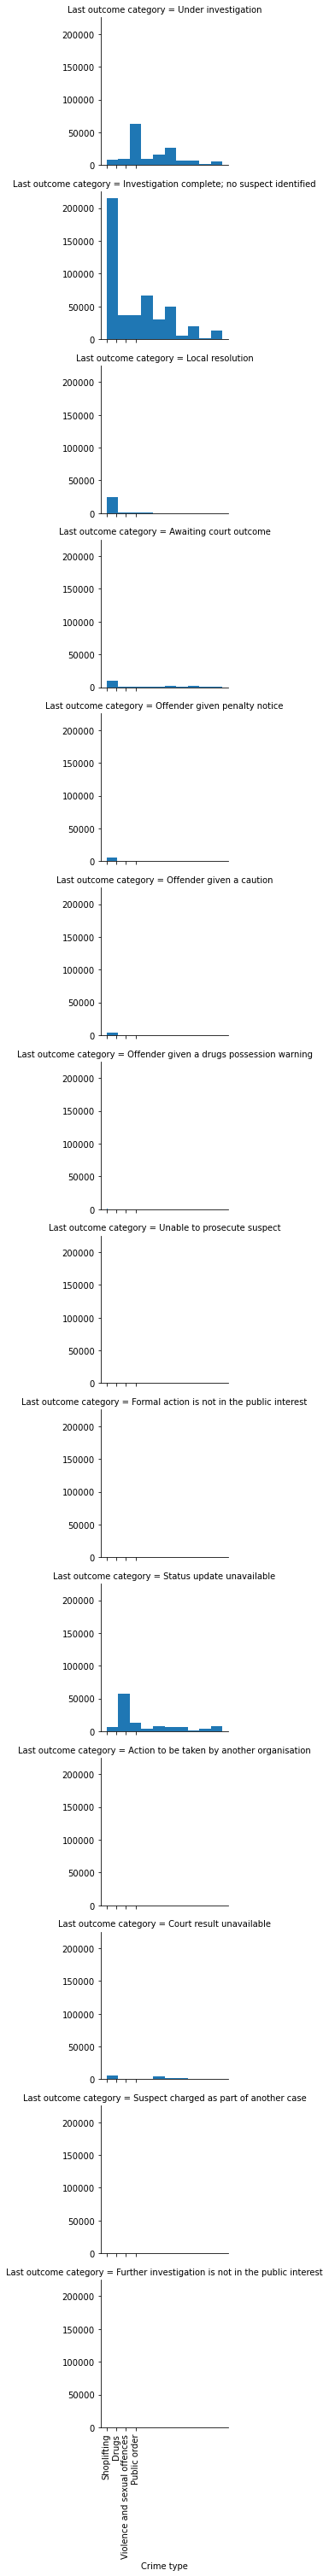

In [74]:
# Which crime type has what outcome (with which prevalence)?
from matplotlib.pyplot import figure
figure(figsize=(100, 100), dpi=100)
g = sns.FacetGrid(df, row = "Last outcome category")
g = g.map(plt.hist, "Crime type")
plt.xticks(rotation=90)
plt.show()

In [75]:
# Show the total counts for the different last outcome categories
df['Last outcome category'].value_counts()

Investigation complete; no suspect identified          472910
Under investigation                                    152859
Status update unavailable                              114672
Local resolution                                        27276
Awaiting court outcome                                  18435
Court result unavailable                                15859
Offender given penalty notice                            6571
Offender given a caution                                 5722
Unable to prosecute suspect                               532
Offender given a drugs possession warning                 404
Formal action is not in the public interest               151
Suspect charged as part of another case                    32
Action to be taken by another organisation                 20
Further investigation is not in the public interest         9
Name: Last outcome category, dtype: int64

In [77]:
# Show the percentage distribution per last outcome category
df['Last outcome category'].value_counts(normalize = True)

Investigation complete; no suspect identified          0.579936
Under investigation                                    0.187453
Status update unavailable                              0.140624
Local resolution                                       0.033449
Awaiting court outcome                                 0.022607
Court result unavailable                               0.019448
Offender given penalty notice                          0.008058
Offender given a caution                               0.007017
Unable to prosecute suspect                            0.000652
Offender given a drugs possession warning              0.000495
Formal action is not in the public interest            0.000185
Suspect charged as part of another case                0.000039
Action to be taken by another organisation             0.000025
Further investigation is not in the public interest    0.000011
Name: Last outcome category, dtype: float64

In [78]:
# Create labels for a pie chart on outcomes
outcome = ['Investigation complete; no suspect identified (58.0%)', 'Under investigation (18.7%)', 'Status update unavailable (14.1%)', 'Local resolution (3.3%)', 'Awaiting court outcome (2.3%)', 'Court result unavailable (1.9%)','Offender given penalty notice (0.8%)','Offender given a caution (0.7%)', 'Unable to prosecute suspect (0.07%)','Offender given a drugs possession warning (0.05%)', 'Formal action is not in the public interest (0.02%)', 'Suspect charged as part of another case (0.004%)', 'Action to be taken by another organisation (0.003%)', 'Further investigation is not in the public interest (0.001%)']

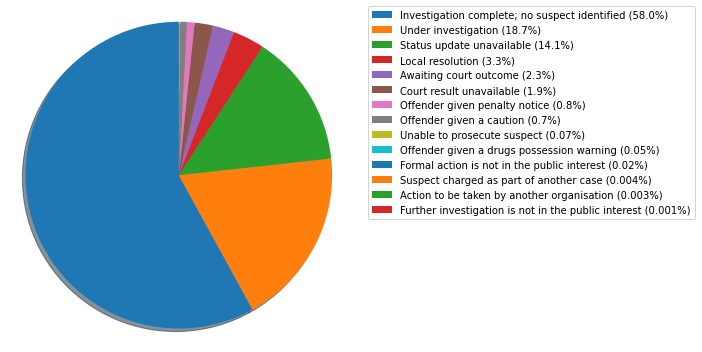

In [79]:
plt.rcParams["figure.figsize"] = [10, 5]
plt.rcParams["figure.autolayout"] = True

labels = outcome
sizes =  df['Last outcome category'].value_counts()

patches, texts = plt.pie(sizes, shadow=True, startangle=90)
plt.legend(patches,labels,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axis('equal')

plt.show()

In [80]:
# Create a new table with the top 9 outcomes and their total counts 
Last_outcome_category = df['Last outcome category'].value_counts().rename_axis('outcome').reset_index(name='counts')
Last_outcome_category.iloc[0:9]

outcome  counts
0  Investigation complete; no suspect identified  472910
1                            Under investigation  152859
2                      Status update unavailable  114672
3                               Local resolution   27276
4                         Awaiting court outcome   18435
5                       Court result unavailable   15859
6                  Offender given penalty notice    6571
7                       Offender given a caution    5722
8                    Unable to prosecute suspect     532

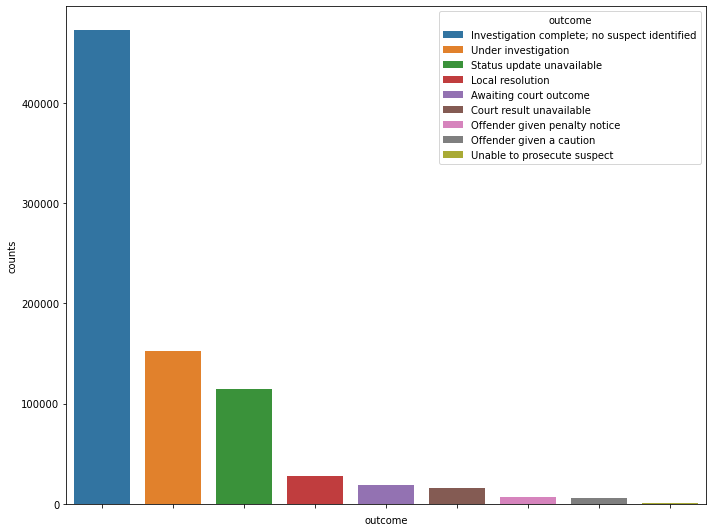

In [81]:
# Create a bar chart of the top 9 outcomes and their counts
top_nine = Last_outcome_category.iloc[0:9]
plt.figure(figsize=(10,7.5))
ax = sns.barplot(x='outcome', y='counts', hue='outcome', data=top_nine, dodge=False)
ax.set(xticklabels=[])

plt.show()

In [82]:
# Percentage of missing data by column
for col in df.columns:
    pct_missing =100* np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

Crime ID - 31.1250961813776%
Month - 0.0%
Reported by - 0.0%
Falls within - 0.0%
Longitude - 0.0%
Latitude - 0.0%
Location - 0.0%
LSOA code - 0.0%
LSOA name - 0.0%
Crime type - 0.0%
Last outcome category - 31.1250961813776%
Context - 100.0%
Location type - 0.0%
Season - 7.646197805502039%
